# Which features are the most predictive in each modality/model?

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import pylab as plt

from scipy import stats
from statannot import add_stat_annotation
import joblib
from sklearn import inspection

from importlib import reload
import sys
import os
sys.path.insert(1,'../')
import plots

In [2]:
reload(plots)
image_path = plots.set_dir()
colors = plots.set_colors()
data_path = '/scratch/c.c21013066/data/ukbiobank/analyses/acc_models/noOsteo'

In [3]:
def plot_features_CI(param,params,ax,ci=95):
    zscore = stats.norm.ppf(1-(1-ci/100)/2)
    print(zscore,ci)
    params = params[params['mean']!=0]
    params = params.sort_values('mean')
    params['CI'] = params['std']/np.sqrt(5)*zscore
    params = params[(np.abs(params['mean'])-params['CI'])>0].reset_index()
    param['sign'] = 'not significant'
    param = param.set_index('index')
    param.loc[params.loc[params['mean']<0,'index'],'sign'] = 'protective'
    param.loc[params.loc[params['mean']>0,'index'],'sign'] = 'harmful'
    param = param.loc[params['index']].reset_index()
    param['f_cat'] = pd.Categorical(
        param['index'], 
        categories=params['index'].values, 
        ordered=True)
    param = param.sort_values('f_cat')
    param['index'] = param['index'].replace(dict_acc)
    param['index'] = param['index'].replace(dict_covs)
    print(param)
    if param.shape[0] > 0:
        ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
                          hue_order=['protective','harmful'],ax=ax)
        ax1.axvline(0,0,13,color='k',linestyle='--')
        ax1.set_xlabel('regression coefficient')
        ax1.set_ylabel('')

In [4]:
dict_acc = {'mean_N_sedentary_intervals_23-07':'how often "sedentary" during night','mean_N_light_intervals_23-07':'how often "light" during night',
            'mean_N_light_intervals_07-23':'how often "light" during day',
            'mean_N_sleep_intervals_07-23':'how often "sleep" during day','mean_movement_during_light':'mean acceleration during "light"',
           'Wednesday_average_acceleration':'average acceleration on Wednesday','Average0200___0259':'average acceleration from 02:00 - 02:59',
            'mean_N_MVPA_intervals_per24h':'how often "MVPA" during 24h','max_sedentary_hours_consecutive':'maximum hours "sedentary" without disruption',
            'mean_N_imputed_intervals_per24h':'how often "imputed" during 24h','std_sleep_hours_per24h':'std of hours "sleep" per 24h',
           'No_wear_time_bias_adjustedmedian':'median acceleration adjusted','Average2300___2359':'average acceleration from 23:00 - 23:59',
           'Average1900___1959':'average acceleration from 19:00 - 19:59','std_sleep_hours_perday':'std of hours "sleep" per day',
           'max_sleep_hours_consecutive':'maxiumum time spent continuously asleep',
           'Average1700___1759':'average acceleration from 17:00 - 17:59',
           'mean_N_imputed_intervals_07-23':'how often "imputed" during day',
           'std_movement_during_light':'std of acceleration during "light"',
           'mean_max_sleep_hours_consecutive_per24h':'mean maxiumum time spent continuously asleep during 24h',
           'mean_N_sleep_intervals_per24h':'how often "sleep" during 24h',
           'mean_sedentary_hours_per24h':'how long "sedentary" during 24h',}
dict_covs = {'accelerometry_age':'age'}

diag_PDHC
4.374070047104616 99.99878048780488
                     index         0     sign                    f_cat
0  PRS_Parkinson's disease  0.213985  harmful  PRS_Parkinson's disease
1  PRS_Parkinson's disease  0.343265  harmful  PRS_Parkinson's disease
2  PRS_Parkinson's disease  0.299291  harmful  PRS_Parkinson's disease
3  PRS_Parkinson's disease  0.202497  harmful  PRS_Parkinson's disease
4  PRS_Parkinson's disease  0.221135  harmful  PRS_Parkinson's disease
diag_PDHC
4.149409984347971 99.99666666666667
                     index         0        sign                    f_cat
0  Diastolic_BloodPressure -0.113241  protective  Diastolic_BloodPressure
1  Diastolic_BloodPressure -0.281453  protective  Diastolic_BloodPressure
2  Diastolic_BloodPressure -0.237726  protective  Diastolic_BloodPressure
3  Diastolic_BloodPressure -0.179917  protective  Diastolic_BloodPressure
4  Diastolic_BloodPressure -0.257101  protective  Diastolic_BloodPressure
diag_PDHC
4.290126431166856 99.9982142

/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99878048780488)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99666666666667)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.995)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99938271604938)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palett

diag_PDHC
4.67123018098148 99.99970059880239
                               index         0        sign  \
0   mean acceleration during "light" -0.574836  protective   
1   mean acceleration during "light" -0.441808  protective   
2   mean acceleration during "light" -0.412264  protective   
3   mean acceleration during "light" -0.400295  protective   
4   mean acceleration during "light" -0.437360  protective   
8       how often "light" during day -0.191850  protective   
7       how often "light" during day -0.241959  protective   
9       how often "light" during day -0.460058  protective   
5       how often "light" during day -0.134398  protective   
6       how often "light" during day -0.304080  protective   
10         Glycatedhaemoglobin_HbA1c -0.155577  protective   
11         Glycatedhaemoglobin_HbA1c -0.082427  protective   
12         Glycatedhaemoglobin_HbA1c -0.157294  protective   
13         Glycatedhaemoglobin_HbA1c -0.148946  protective   
14         Glycatedhaemog

/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99970059880239)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


diag_ProdHC
4.374070047104616 99.99878048780488
Empty DataFrame
Columns: [index, 0, sign, f_cat]
Index: []
diag_ProdHC
4.149409984347971 99.99666666666667
Empty DataFrame
Columns: [index, 0, sign, f_cat]
Index: []
diag_ProdHC
4.290126431166856 99.99821428571428
  index         0        sign f_cat
0  SHBG -0.414382  protective  SHBG
1  SHBG -0.256700  protective  SHBG
2  SHBG -0.574064  protective  SHBG
3  SHBG -0.117452  protective  SHBG
4  SHBG -0.538360  protective  SHBG
diag_ProdHC
4.055626981122946 99.995
                           index         0     sign  \
0   UrinaryIncontinence_beforePD  1.240360  harmful   
1   UrinaryIncontinence_beforePD  0.229575  harmful   
2   UrinaryIncontinence_beforePD  0.562205  harmful   
3   UrinaryIncontinence_beforePD  1.150460  harmful   
4   UrinaryIncontinence_beforePD  1.289974  harmful   
5          Constipation_beforePD  1.919445  harmful   
6          Constipation_beforePD  1.840003  harmful   
7          Constipation_beforePD  1.958927  h

/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99821428571428)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.995)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99938271604938)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99970059880239)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palett

diag_ProdHC
4.67123018098148 99.99970059880239
                                index         0        sign  \
0    mean acceleration during "light" -0.531843  protective   
1    mean acceleration during "light" -0.555437  protective   
2    mean acceleration during "light" -0.508616  protective   
3    mean acceleration during "light" -0.552059  protective   
4    mean acceleration during "light" -0.543666  protective   
5   average acceleration on Wednesday -0.162252  protective   
6   average acceleration on Wednesday -0.132178  protective   
7   average acceleration on Wednesday -0.347172  protective   
8   average acceleration on Wednesday -0.171412  protective   
9   average acceleration on Wednesday -0.274863  protective   
10            PRS_Parkinson's disease  0.095867     harmful   
11            PRS_Parkinson's disease  0.157568     harmful   
12            PRS_Parkinson's disease  0.263855     harmful   
13            PRS_Parkinson's disease  0.302044     harmful   
14      

/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99878048780488)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99666666666667)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99821428571428)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],


diag_PDProdHC
4.055626981122946 99.995
                           index         0     sign  \
0          Constipation_beforePD  1.402539  harmful   
1          Constipation_beforePD  1.445926  harmful   
2          Constipation_beforePD  1.101137  harmful   
3          Constipation_beforePD  1.556013  harmful   
4          Constipation_beforePD  1.346447  harmful   
5   ErectileDysfunction_beforePD  2.527415  harmful   
6   ErectileDysfunction_beforePD  2.066519  harmful   
7   ErectileDysfunction_beforePD  2.606646  harmful   
8   ErectileDysfunction_beforePD  1.902457  harmful   
9   ErectileDysfunction_beforePD  1.585310  harmful   
13             Hyposmia_beforePD  5.744745  harmful   
12             Hyposmia_beforePD  5.070609  harmful   
14             Hyposmia_beforePD  5.453768  harmful   
10             Hyposmia_beforePD  2.754748  harmful   
11             Hyposmia_beforePD  3.106790  harmful   
15                  RBD_beforePD  3.364724  harmful   
16                  RBD_be

/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.995)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99938271604938)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],


diag_PDProdHC
4.67123018098148 99.99970059880239
                                      index         0        sign  \
0          mean acceleration during "light" -0.973603  protective   
1          mean acceleration during "light" -0.867408  protective   
2          mean acceleration during "light" -0.739801  protective   
3          mean acceleration during "light" -0.854410  protective   
4          mean acceleration during "light" -0.578538  protective   
9                                       age -0.134090  protective   
7                                       age -0.221822  protective   
8                                       age -0.223704  protective   
5                                       age -0.202932  protective   
6                                       age -0.298921  protective   
10  maxiumum time spent continuously asleep -0.121545  protective   
11  maxiumum time spent continuously asleep -0.205071  protective   
12  maxiumum time spent continuously asleep -0.193345 

/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99970059880239)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99878048780488)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


diag_PDHC
4.374070047104616 99.99878048780488
                               index          0        sign  \
0            family_Severedepression  -2.164962  protective   
1            family_Severedepression  -6.611054  protective   
2            family_Severedepression  -6.378824  protective   
3            family_Severedepression  -5.845150  protective   
4            family_Severedepression  -7.275846  protective   
5   PRS_Systemic lupus erythematosus   2.106008     harmful   
6   PRS_Systemic lupus erythematosus   4.045085     harmful   
7   PRS_Systemic lupus erythematosus   2.369205     harmful   
8   PRS_Systemic lupus erythematosus   1.441553     harmful   
9   PRS_Systemic lupus erythematosus   1.168052     harmful   
14                              male   8.944727     harmful   
13                              male   3.725511     harmful   
12                              male   6.516810     harmful   
11                              male  10.657288     harmful   
10       

/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99821428571428)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.995)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99938271604938)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],


diag_PDHC
4.520381140921648 99.99938271604938
                                                index         0        sign  \
0                    mean acceleration during "light" -1.095313  protective   
1                    mean acceleration during "light" -1.055014  protective   
2                    mean acceleration during "light" -0.761685  protective   
3                    mean acceleration during "light" -0.898931  protective   
4                    mean acceleration during "light" -0.697527  protective   
5             average acceleration from 17:00 - 17:59 -0.327360  protective   
6             average acceleration from 17:00 - 17:59 -0.514179  protective   
7             average acceleration from 17:00 - 17:59 -0.566307  protective   
8             average acceleration from 17:00 - 17:59 -0.923567  protective   
9             average acceleration from 17:00 - 17:59 -0.629277  protective   
14            average acceleration from 19:00 - 19:59 -0.612323  protective   
12    

/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99970059880239)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],


diag_ProdHC
4.374070047104616 99.99878048780488
                      index          0     sign                    f_cat
0   PRS_Parkinson's disease   6.665257  harmful  PRS_Parkinson's disease
1   PRS_Parkinson's disease   4.269153  harmful  PRS_Parkinson's disease
2   PRS_Parkinson's disease   3.243974  harmful  PRS_Parkinson's disease
3   PRS_Parkinson's disease   6.951101  harmful  PRS_Parkinson's disease
4   PRS_Parkinson's disease   2.400302  harmful  PRS_Parkinson's disease
5                      male  16.261923  harmful                     male
6                      male  10.686676  harmful                     male
7                      male  10.536583  harmful                     male
8                      male  12.260599  harmful                     male
9                      male  12.271161  harmful                     male
10                      age  18.174072  harmful        accelerometry_age
11                      age  11.910246  harmful        accelerometry_age
12 

/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99878048780488)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99666666666667)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99821428571428)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.995)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palett

diag_ProdHC
4.520381140921648 99.99938271604938
                                index         0        sign  \
0    mean acceleration during "light" -0.826956  protective   
1    mean acceleration during "light" -0.563245  protective   
2    mean acceleration during "light" -1.162844  protective   
3    mean acceleration during "light" -0.836875  protective   
4    mean acceleration during "light" -1.207212  protective   
8   average acceleration on Wednesday -0.495838  protective   
7   average acceleration on Wednesday -0.527462  protective   
9   average acceleration on Wednesday -0.734273  protective   
5   average acceleration on Wednesday -0.633980  protective   
6   average acceleration on Wednesday -0.307191  protective   
10     how often "light" during night -0.523313  protective   
11     how often "light" during night -0.191566  protective   
12     how often "light" during night -0.367743  protective   
13     how often "light" during night -0.307026  protective   
14     

/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99938271604938)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99970059880239)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],


diag_PDProdHC
4.374070047104616 99.99878048780488
                                       index         0        sign  \
0                       PRS_Ischaemic stroke -1.711888  protective   
1                       PRS_Ischaemic stroke -2.083882  protective   
2                       PRS_Ischaemic stroke -2.111270  protective   
3                       PRS_Ischaemic stroke -0.383487  protective   
4                       PRS_Ischaemic stroke -1.854274  protective   
5                          PRS_Breast cancer -1.407056  protective   
6                          PRS_Breast cancer -1.155197  protective   
7                          PRS_Breast cancer -0.456750  protective   
8                          PRS_Breast cancer -1.710117  protective   
9                          PRS_Breast cancer -1.552111  protective   
14  PRS_Glycated haemoglobin (diabetes free)  0.988778     harmful   
13  PRS_Glycated haemoglobin (diabetes free)  0.780149     harmful   
12  PRS_Glycated haemoglobin (diabetes f

/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99878048780488)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99666666666667)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99821428571428)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],


diag_PDProdHC
4.055626981122946 99.995
                  index          0     sign                f_cat
0     Hyposmia_beforePD  14.621847  harmful    Hyposmia_beforePD
1     Hyposmia_beforePD  20.143901  harmful    Hyposmia_beforePD
2     Hyposmia_beforePD  25.463088  harmful    Hyposmia_beforePD
3     Hyposmia_beforePD  32.450922  harmful    Hyposmia_beforePD
4     Hyposmia_beforePD  12.560955  harmful    Hyposmia_beforePD
8          RBD_beforePD  41.057465  harmful         RBD_beforePD
7          RBD_beforePD  27.737742  harmful         RBD_beforePD
9          RBD_beforePD  37.405109  harmful         RBD_beforePD
5          RBD_beforePD  47.291777  harmful         RBD_beforePD
6          RBD_beforePD  33.523834  harmful         RBD_beforePD
10  Depression_beforePD  63.788526  harmful  Depression_beforePD
11  Depression_beforePD  54.586443  harmful  Depression_beforePD
12  Depression_beforePD  61.849008  harmful  Depression_beforePD
13  Depression_beforePD  73.206652  harmful  Depres

/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.995)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99938271604938)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],


diag_PDProdHC
4.67123018098148 99.99970059880239
                                index         0        sign  \
0    mean acceleration during "light" -1.504183  protective   
1    mean acceleration during "light" -1.670396  protective   
2    mean acceleration during "light" -1.129304  protective   
3    mean acceleration during "light" -1.064283  protective   
4    mean acceleration during "light" -1.174638  protective   
9      how often "light" during night -0.510805  protective   
7      how often "light" during night -0.424883  protective   
8      how often "light" during night -0.588363  protective   
5      how often "light" during night -0.387170  protective   
6      how often "light" during night -0.559979  protective   
10     how often "imputed" during day -0.319899  protective   
11     how often "imputed" during day -0.539431  protective   
12     how often "imputed" during day -0.272939  protective   
13     how often "imputed" during day -0.367780  protective   
14    

/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99970059880239)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],


diag_PDPopulationNoProd
4.374070047104616 99.99878048780488
                                         index          0     sign  \
0   PRS_Estimated bone mineral density T-score   3.088784  harmful   
1   PRS_Estimated bone mineral density T-score   2.726293  harmful   
2   PRS_Estimated bone mineral density T-score   2.451330  harmful   
3   PRS_Estimated bone mineral density T-score   5.263506  harmful   
4   PRS_Estimated bone mineral density T-score   3.031795  harmful   
5                                PRS_Psoriasis   5.251095  harmful   
6                                PRS_Psoriasis   4.779889  harmful   
7                                PRS_Psoriasis   2.068752  harmful   
8                                PRS_Psoriasis   5.250579  harmful   
9                                PRS_Psoriasis   3.033042  harmful   
14                     PRS_Parkinson's disease   2.394418  harmful   
13                     PRS_Parkinson's disease   1.971113  harmful   
12                     PRS_Par

/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99878048780488)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99666666666667)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99821428571428)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],


diag_PDPopulationNoProd
4.055626981122946 99.995
Empty DataFrame
Columns: [index, 0, sign, f_cat]
Index: []
diag_PDPopulationNoProd
4.520381140921648 99.99938271604938
                               index         0        sign  \
0   mean acceleration during "light" -1.061460  protective   
1   mean acceleration during "light" -1.177901  protective   
2   mean acceleration during "light" -1.072293  protective   
3   mean acceleration during "light" -0.812984  protective   
4   mean acceleration during "light" -1.030860  protective   
5     how often "light" during night -0.474785  protective   
6     how often "light" during night -0.610569  protective   
7     how often "light" during night -0.404421  protective   
8     how often "light" during night -0.191945  protective   
9     how often "light" during night -0.499768  protective   
10      median acceleration adjusted  0.868146     harmful   
11      median acceleration adjusted  0.820036     harmful   
12      median acceleratio

/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99938271604938)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99970059880239)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],


diag_ProdPopulationNoPD
4.374070047104616 99.99878048780488
  index          0     sign              f_cat
0   age  21.849264  harmful  accelerometry_age
1   age  13.794714  harmful  accelerometry_age
2   age  17.464981  harmful  accelerometry_age
3   age  23.644889  harmful  accelerometry_age
4   age  17.760073  harmful  accelerometry_age
5  male  26.804119  harmful               male
6  male   7.805572  harmful               male
7  male  18.570265  harmful               male
8  male  18.865541  harmful               male
9  male  23.695030  harmful               male
diag_ProdPopulationNoPD
4.149409984347971 99.99666666666667
                    index         0        sign                  f_cat
0   AlcoholStatus_Current -5.989492  protective  AlcoholStatus_Current
1   AlcoholStatus_Current -4.663011  protective  AlcoholStatus_Current
2   AlcoholStatus_Current -1.157722  protective  AlcoholStatus_Current
3   AlcoholStatus_Current -5.295203  protective  AlcoholStatus_Current
4   Alco

/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99878048780488)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99666666666667)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99821428571428)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99938271604938)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='s

diag_ProdPopulationNoPD
4.67123018098148 99.99970059880239
                               index         0        sign  \
0   mean acceleration during "light" -1.665808  protective   
1   mean acceleration during "light" -1.464308  protective   
2   mean acceleration during "light" -0.791506  protective   
3   mean acceleration during "light" -0.852692  protective   
4   mean acceleration during "light" -0.685930  protective   
5                       Testosterone  0.487723     harmful   
6                       Testosterone  0.292679     harmful   
7                       Testosterone  0.195246     harmful   
8                       Testosterone  0.252830     harmful   
9                       Testosterone  0.160977     harmful   
10                               age  0.682467     harmful   
11                               age  0.458410     harmful   
12                               age  0.404161     harmful   
13                               age  0.621176     harmful   
14         

/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99970059880239)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],


diag_PDProdPopulation
4.374070047104616 99.99878048780488
                       index          0        sign                     f_cat
0        PRS_HDL cholesterol  -0.961309  protective       PRS_HDL cholesterol
1        PRS_HDL cholesterol  -1.238355  protective       PRS_HDL cholesterol
2        PRS_HDL cholesterol  -0.715265  protective       PRS_HDL cholesterol
3        PRS_HDL cholesterol  -2.083030  protective       PRS_HDL cholesterol
4        PRS_HDL cholesterol  -1.371091  protective       PRS_HDL cholesterol
5    PRS_Parkinson's disease   2.862019     harmful   PRS_Parkinson's disease
6    PRS_Parkinson's disease   0.689307     harmful   PRS_Parkinson's disease
7    PRS_Parkinson's disease   2.215720     harmful   PRS_Parkinson's disease
8    PRS_Parkinson's disease   1.269463     harmful   PRS_Parkinson's disease
9    PRS_Parkinson's disease   1.555759     harmful   PRS_Parkinson's disease
14                      male   4.167592     harmful                      male
13    

/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99878048780488)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99666666666667)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],
/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99821428571428)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],


diag_PDProdPopulation
4.055626981122946 99.995
Empty DataFrame
Columns: [index, 0, sign, f_cat]
Index: []
diag_PDProdPopulation
4.520381140921648 99.99938271604938
                               index         0        sign  \
0   mean acceleration during "light" -1.059547  protective   
1   mean acceleration during "light" -1.421873  protective   
2   mean acceleration during "light" -0.842412  protective   
3   mean acceleration during "light" -1.387595  protective   
4   mean acceleration during "light" -1.007304  protective   
..                               ...       ...         ...   
72      median acceleration adjusted  0.631484     harmful   
73      median acceleration adjusted  0.598140     harmful   
70      median acceleration adjusted  0.618261     harmful   
71      median acceleration adjusted  0.628087     harmful   
74      median acceleration adjusted  0.529926     harmful   

                               f_cat  
0         mean_movement_during_light  
1         mea

/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99938271604938)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],


diag_PDProdPopulation
4.67123018098148 99.99970059880239
                                index         0        sign  \
0    mean acceleration during "light" -1.145139  protective   
1    mean acceleration during "light" -1.513174  protective   
2    mean acceleration during "light" -0.850570  protective   
3    mean acceleration during "light" -1.503331  protective   
4    mean acceleration during "light" -1.038093  protective   
..                                ...       ...         ...   
162          family_Parkinsonsdisease  0.897209     harmful   
163          family_Parkinsonsdisease  1.125263     harmful   
160          family_Parkinsonsdisease  0.774254     harmful   
161          family_Parkinsonsdisease  0.788020     harmful   
164          family_Parkinsonsdisease  0.494379     harmful   

                          f_cat  
0    mean_movement_during_light  
1    mean_movement_during_light  
2    mean_movement_during_light  
3    mean_movement_during_light  
4    mean_moveme

/tmp/ipykernel_231891/597054137.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99970059880239)` for the same effect.

  ax1 = sns.pointplot(x=0,y='index',data=param,ci=ci,join=False,hue='sign',palette=['blue','red','grey'],


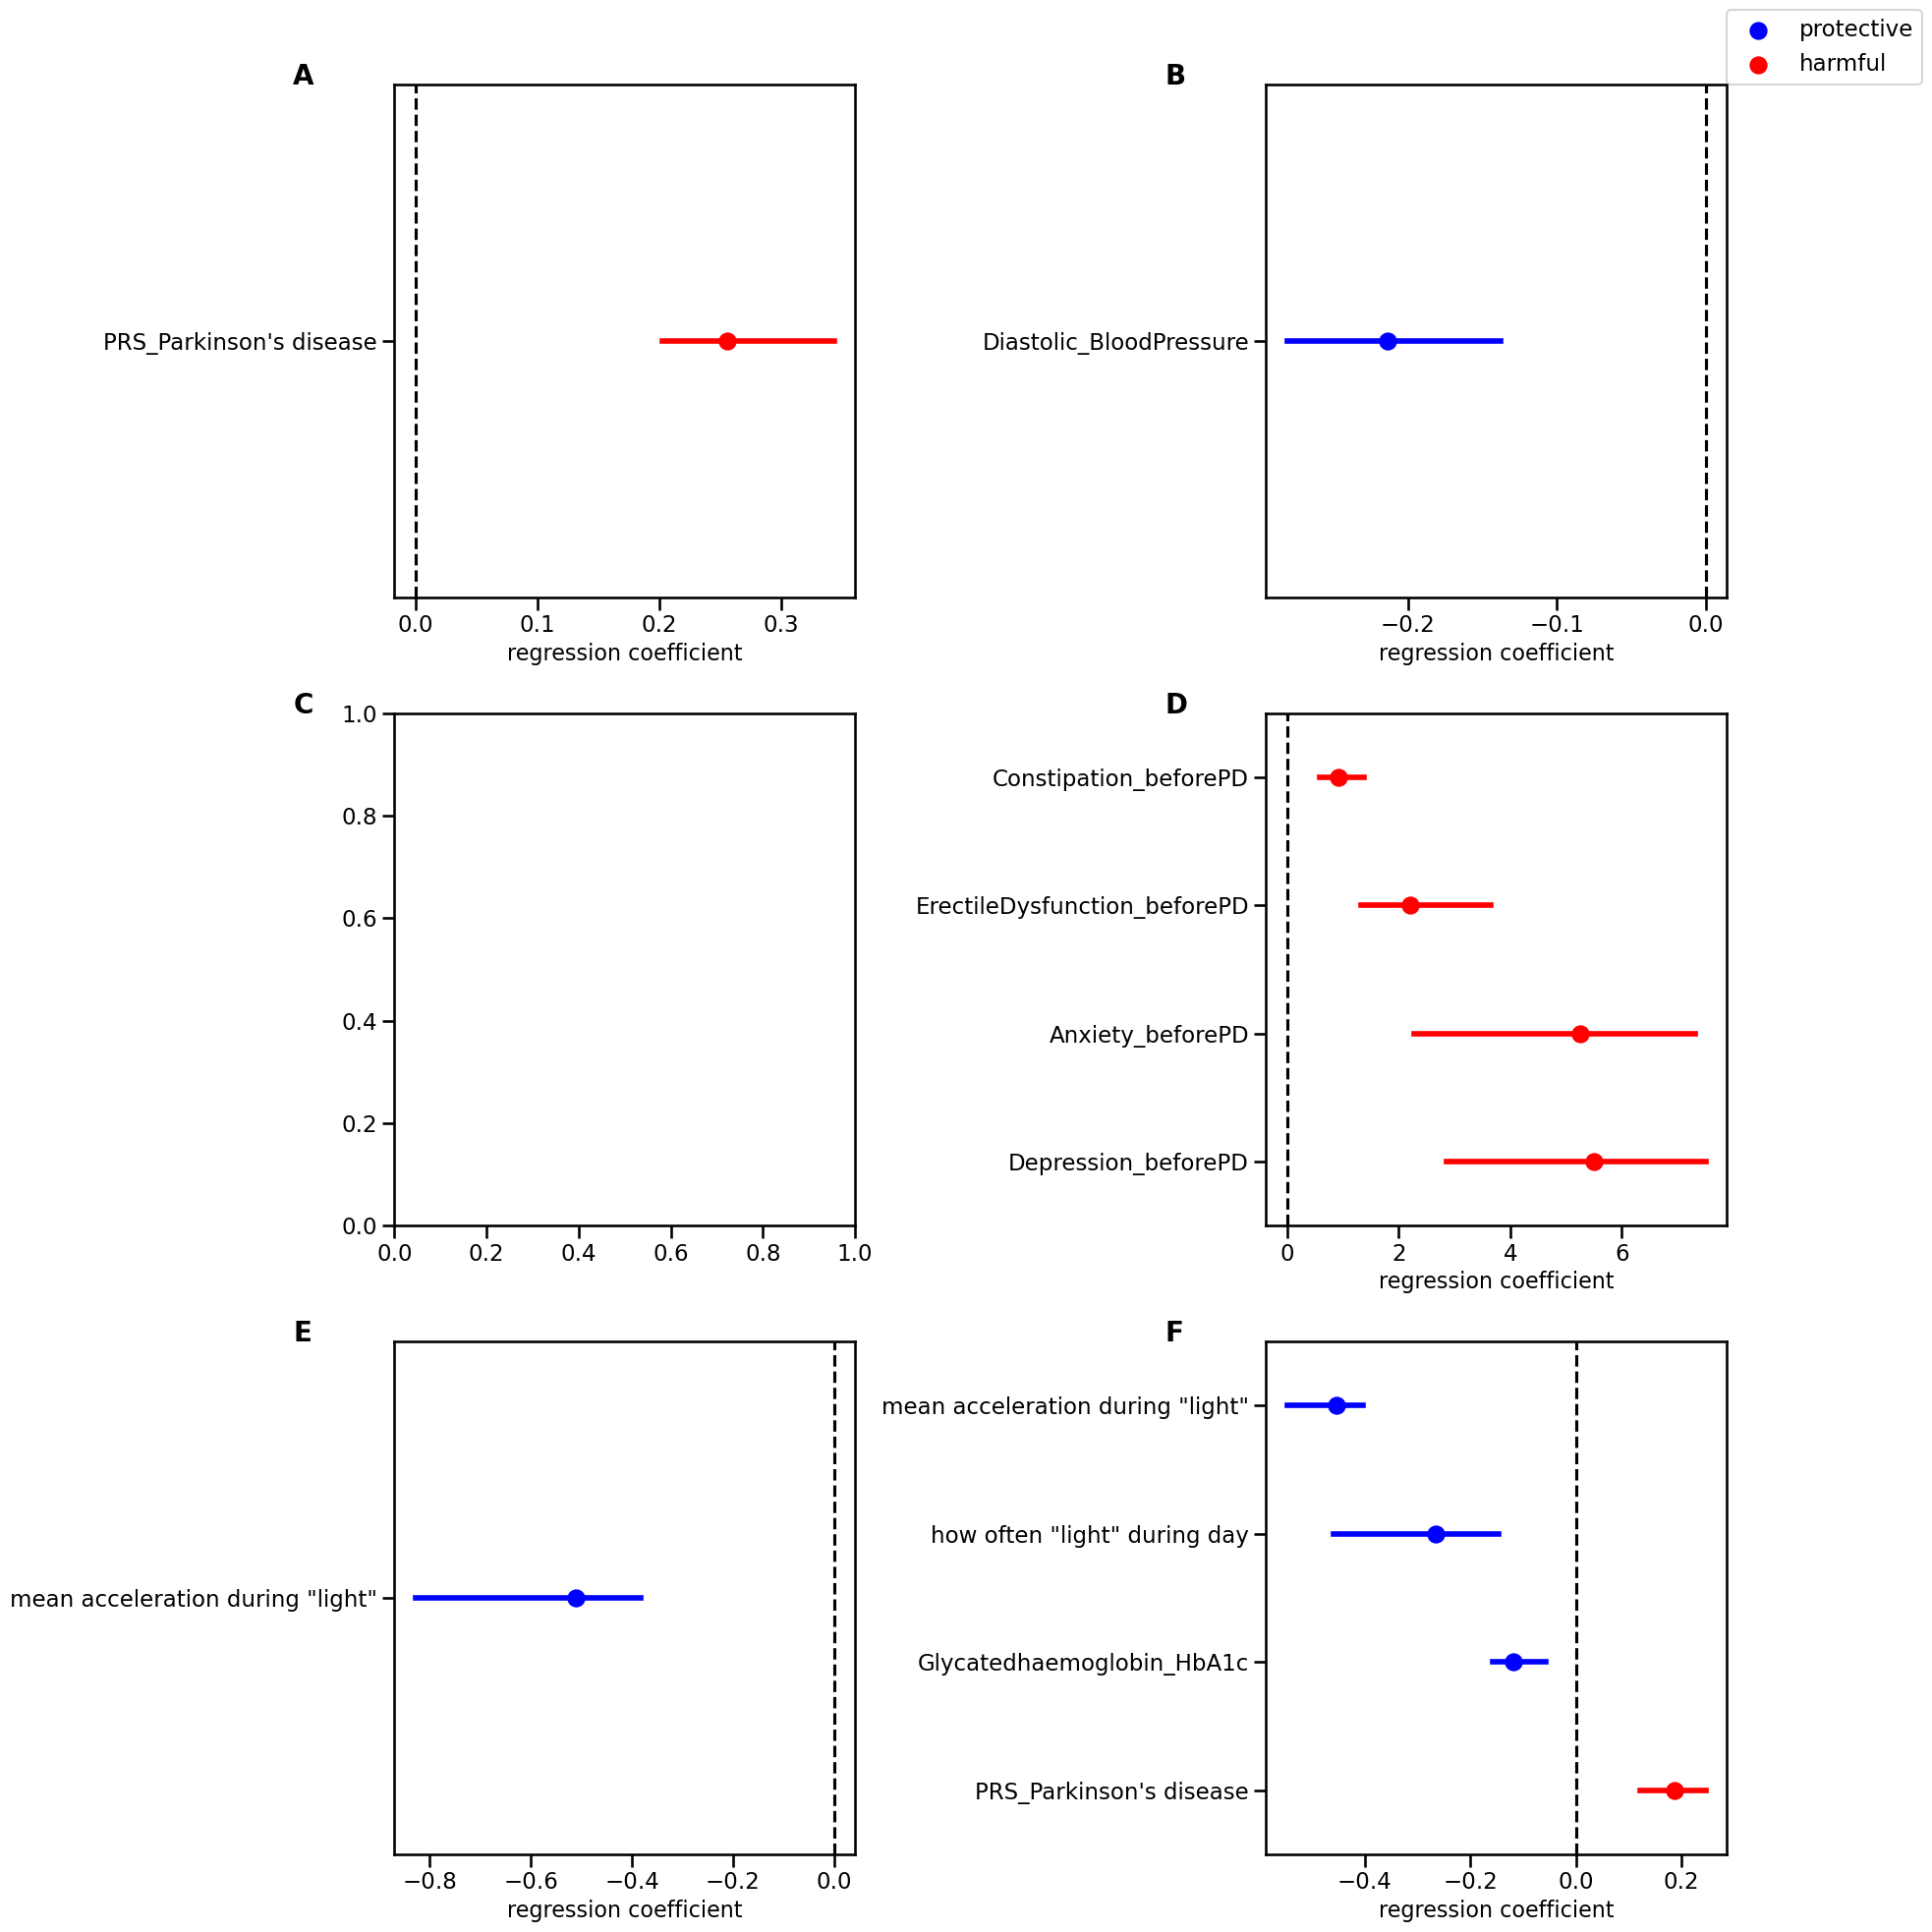

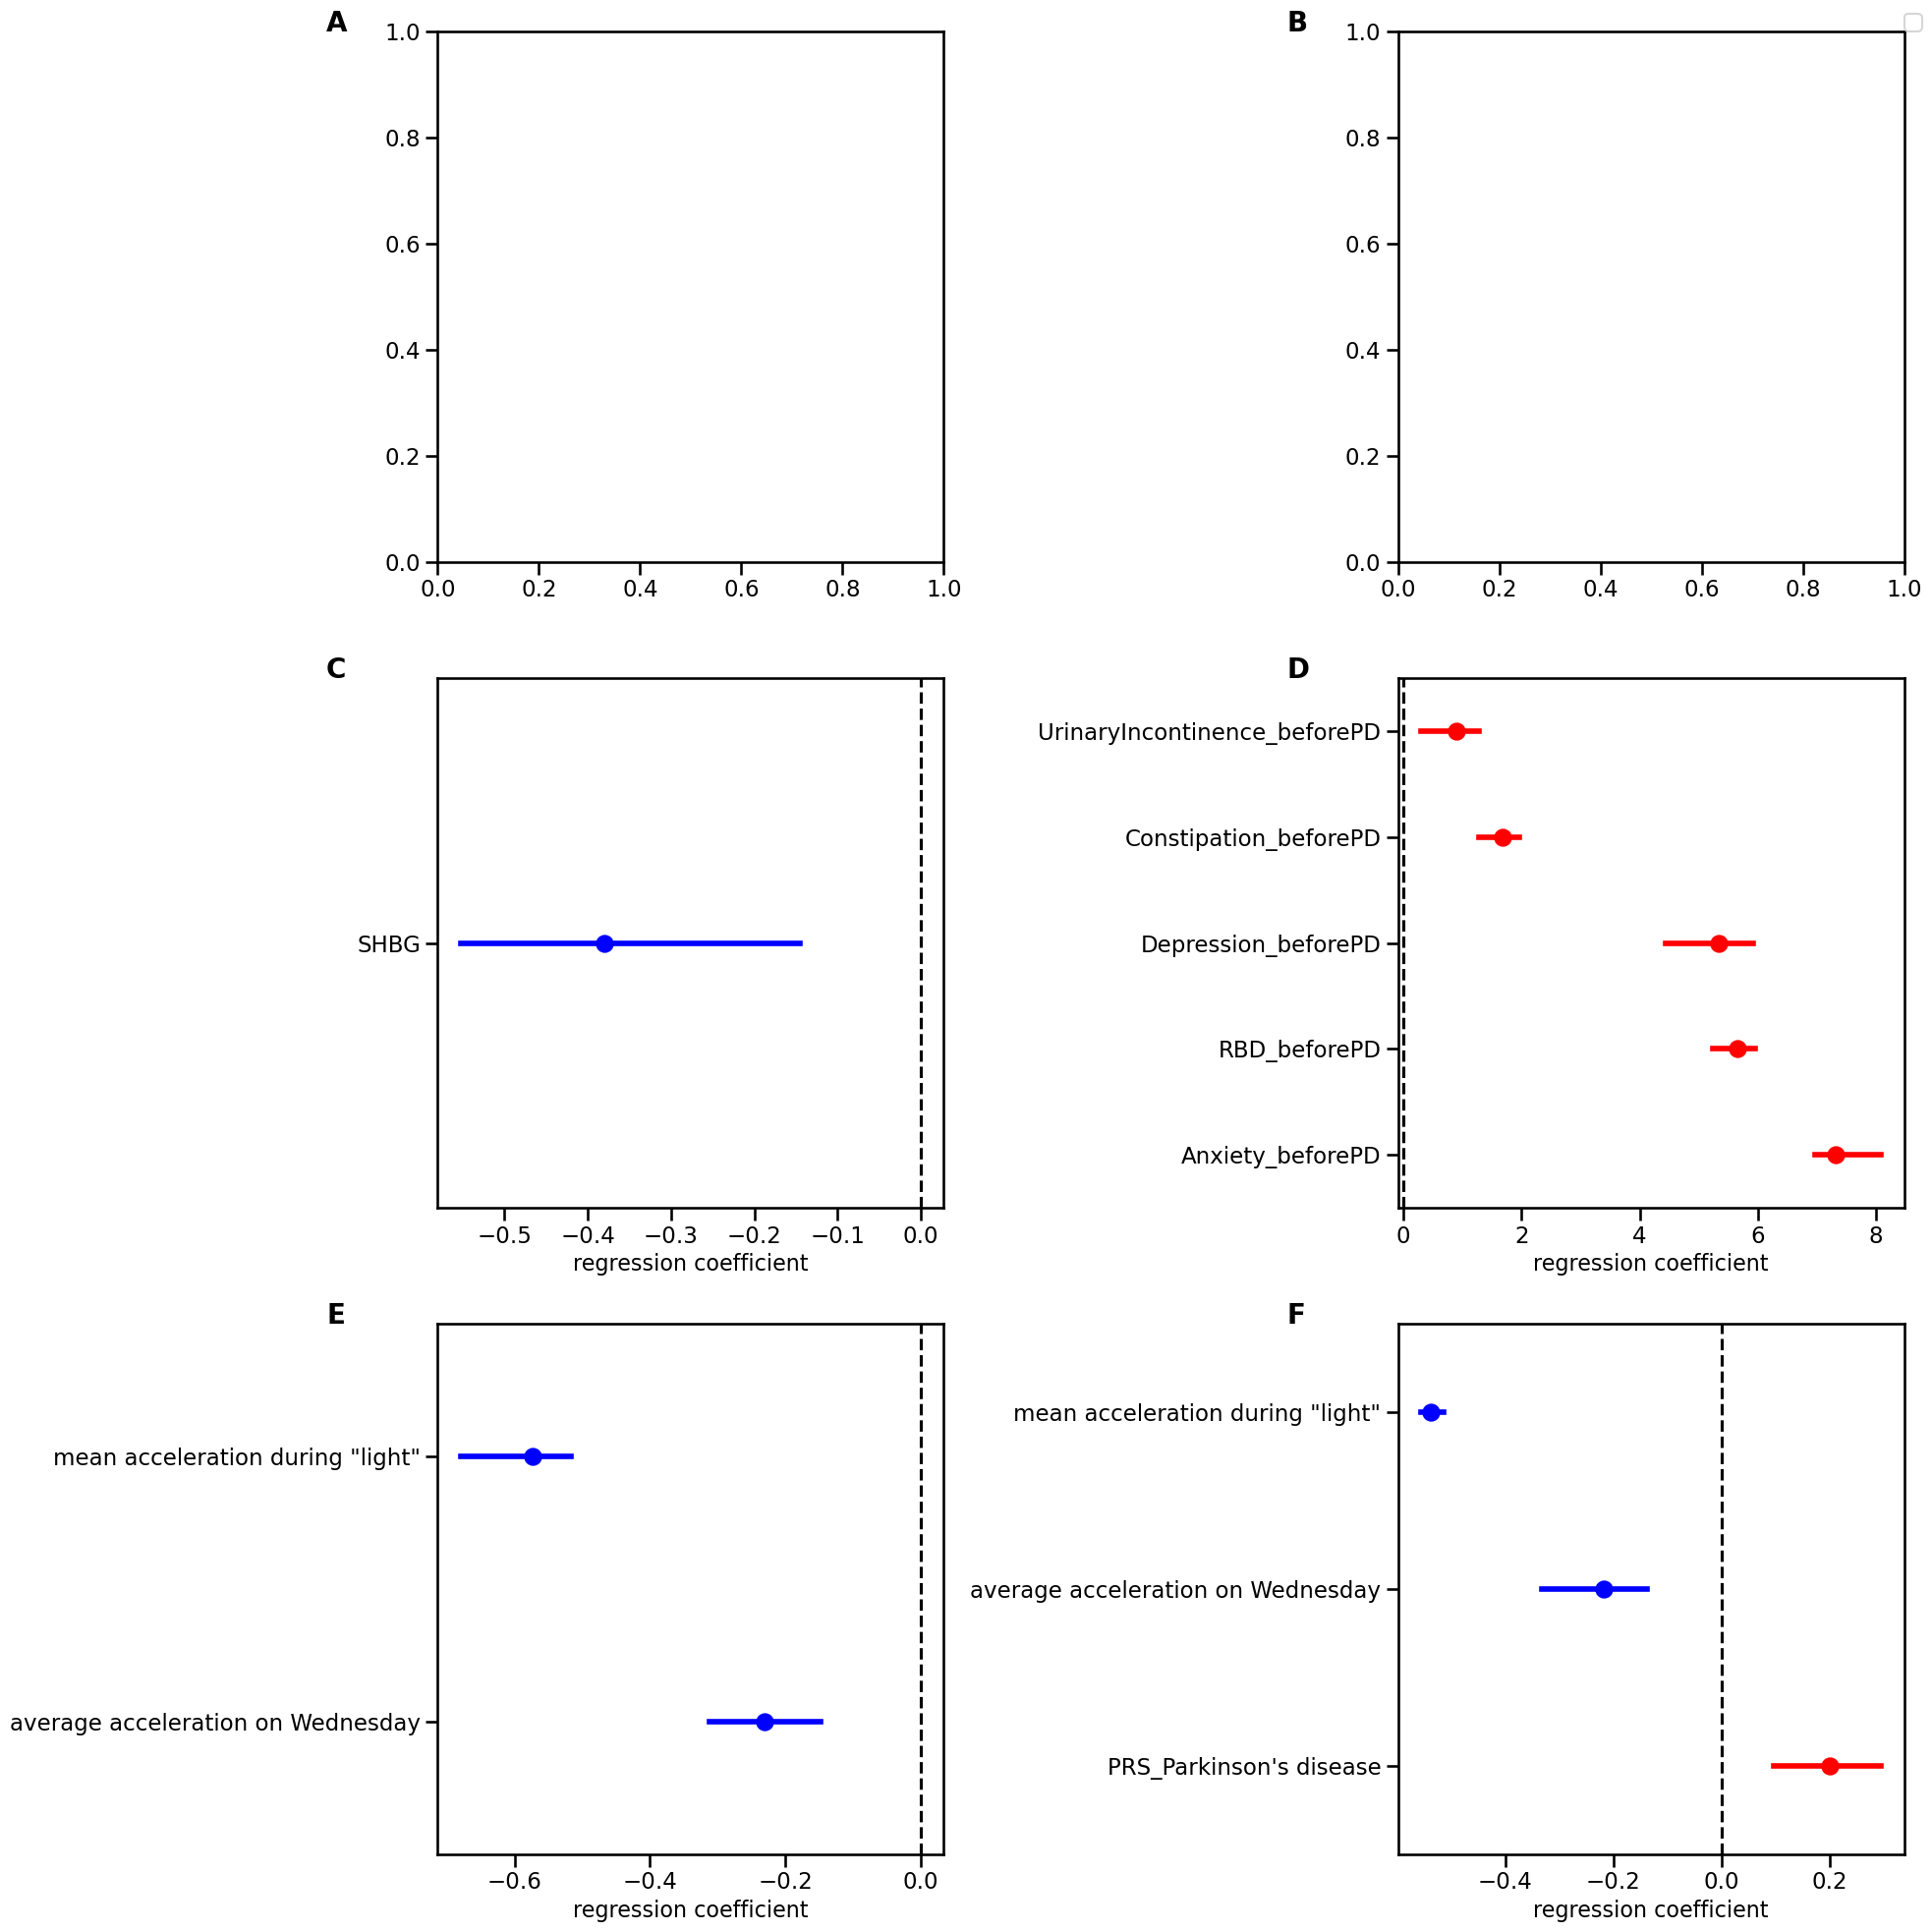

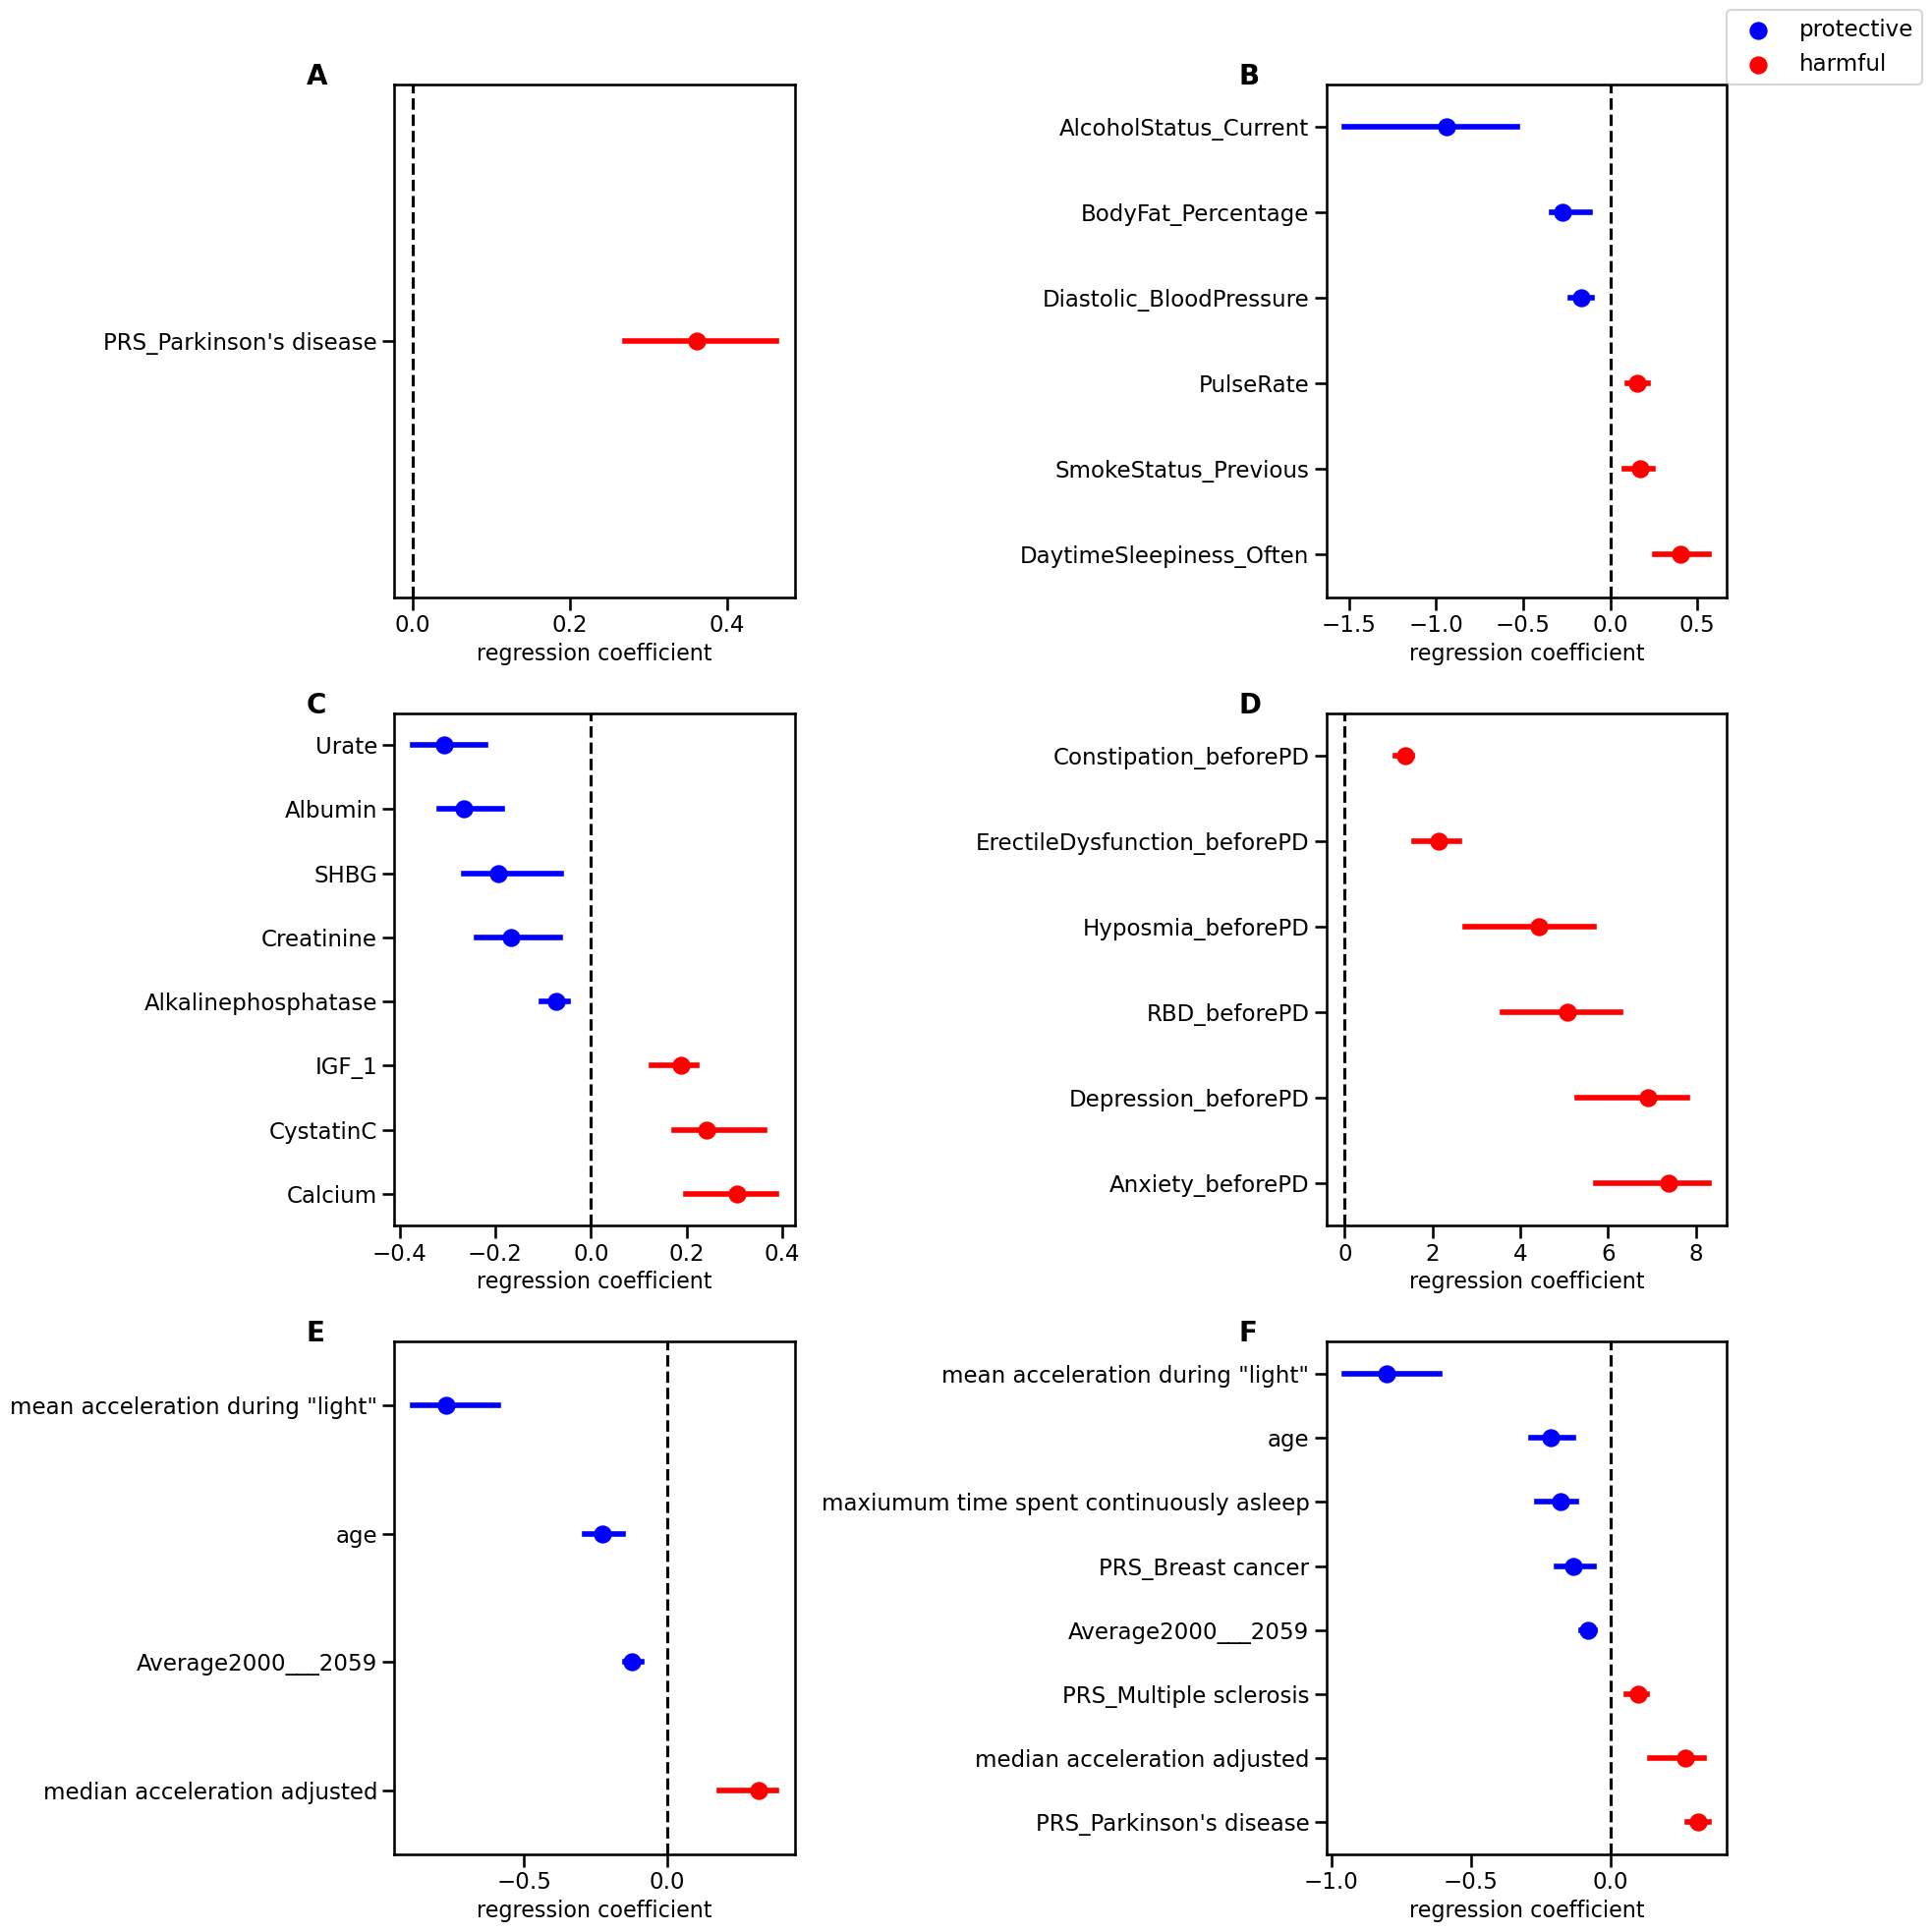

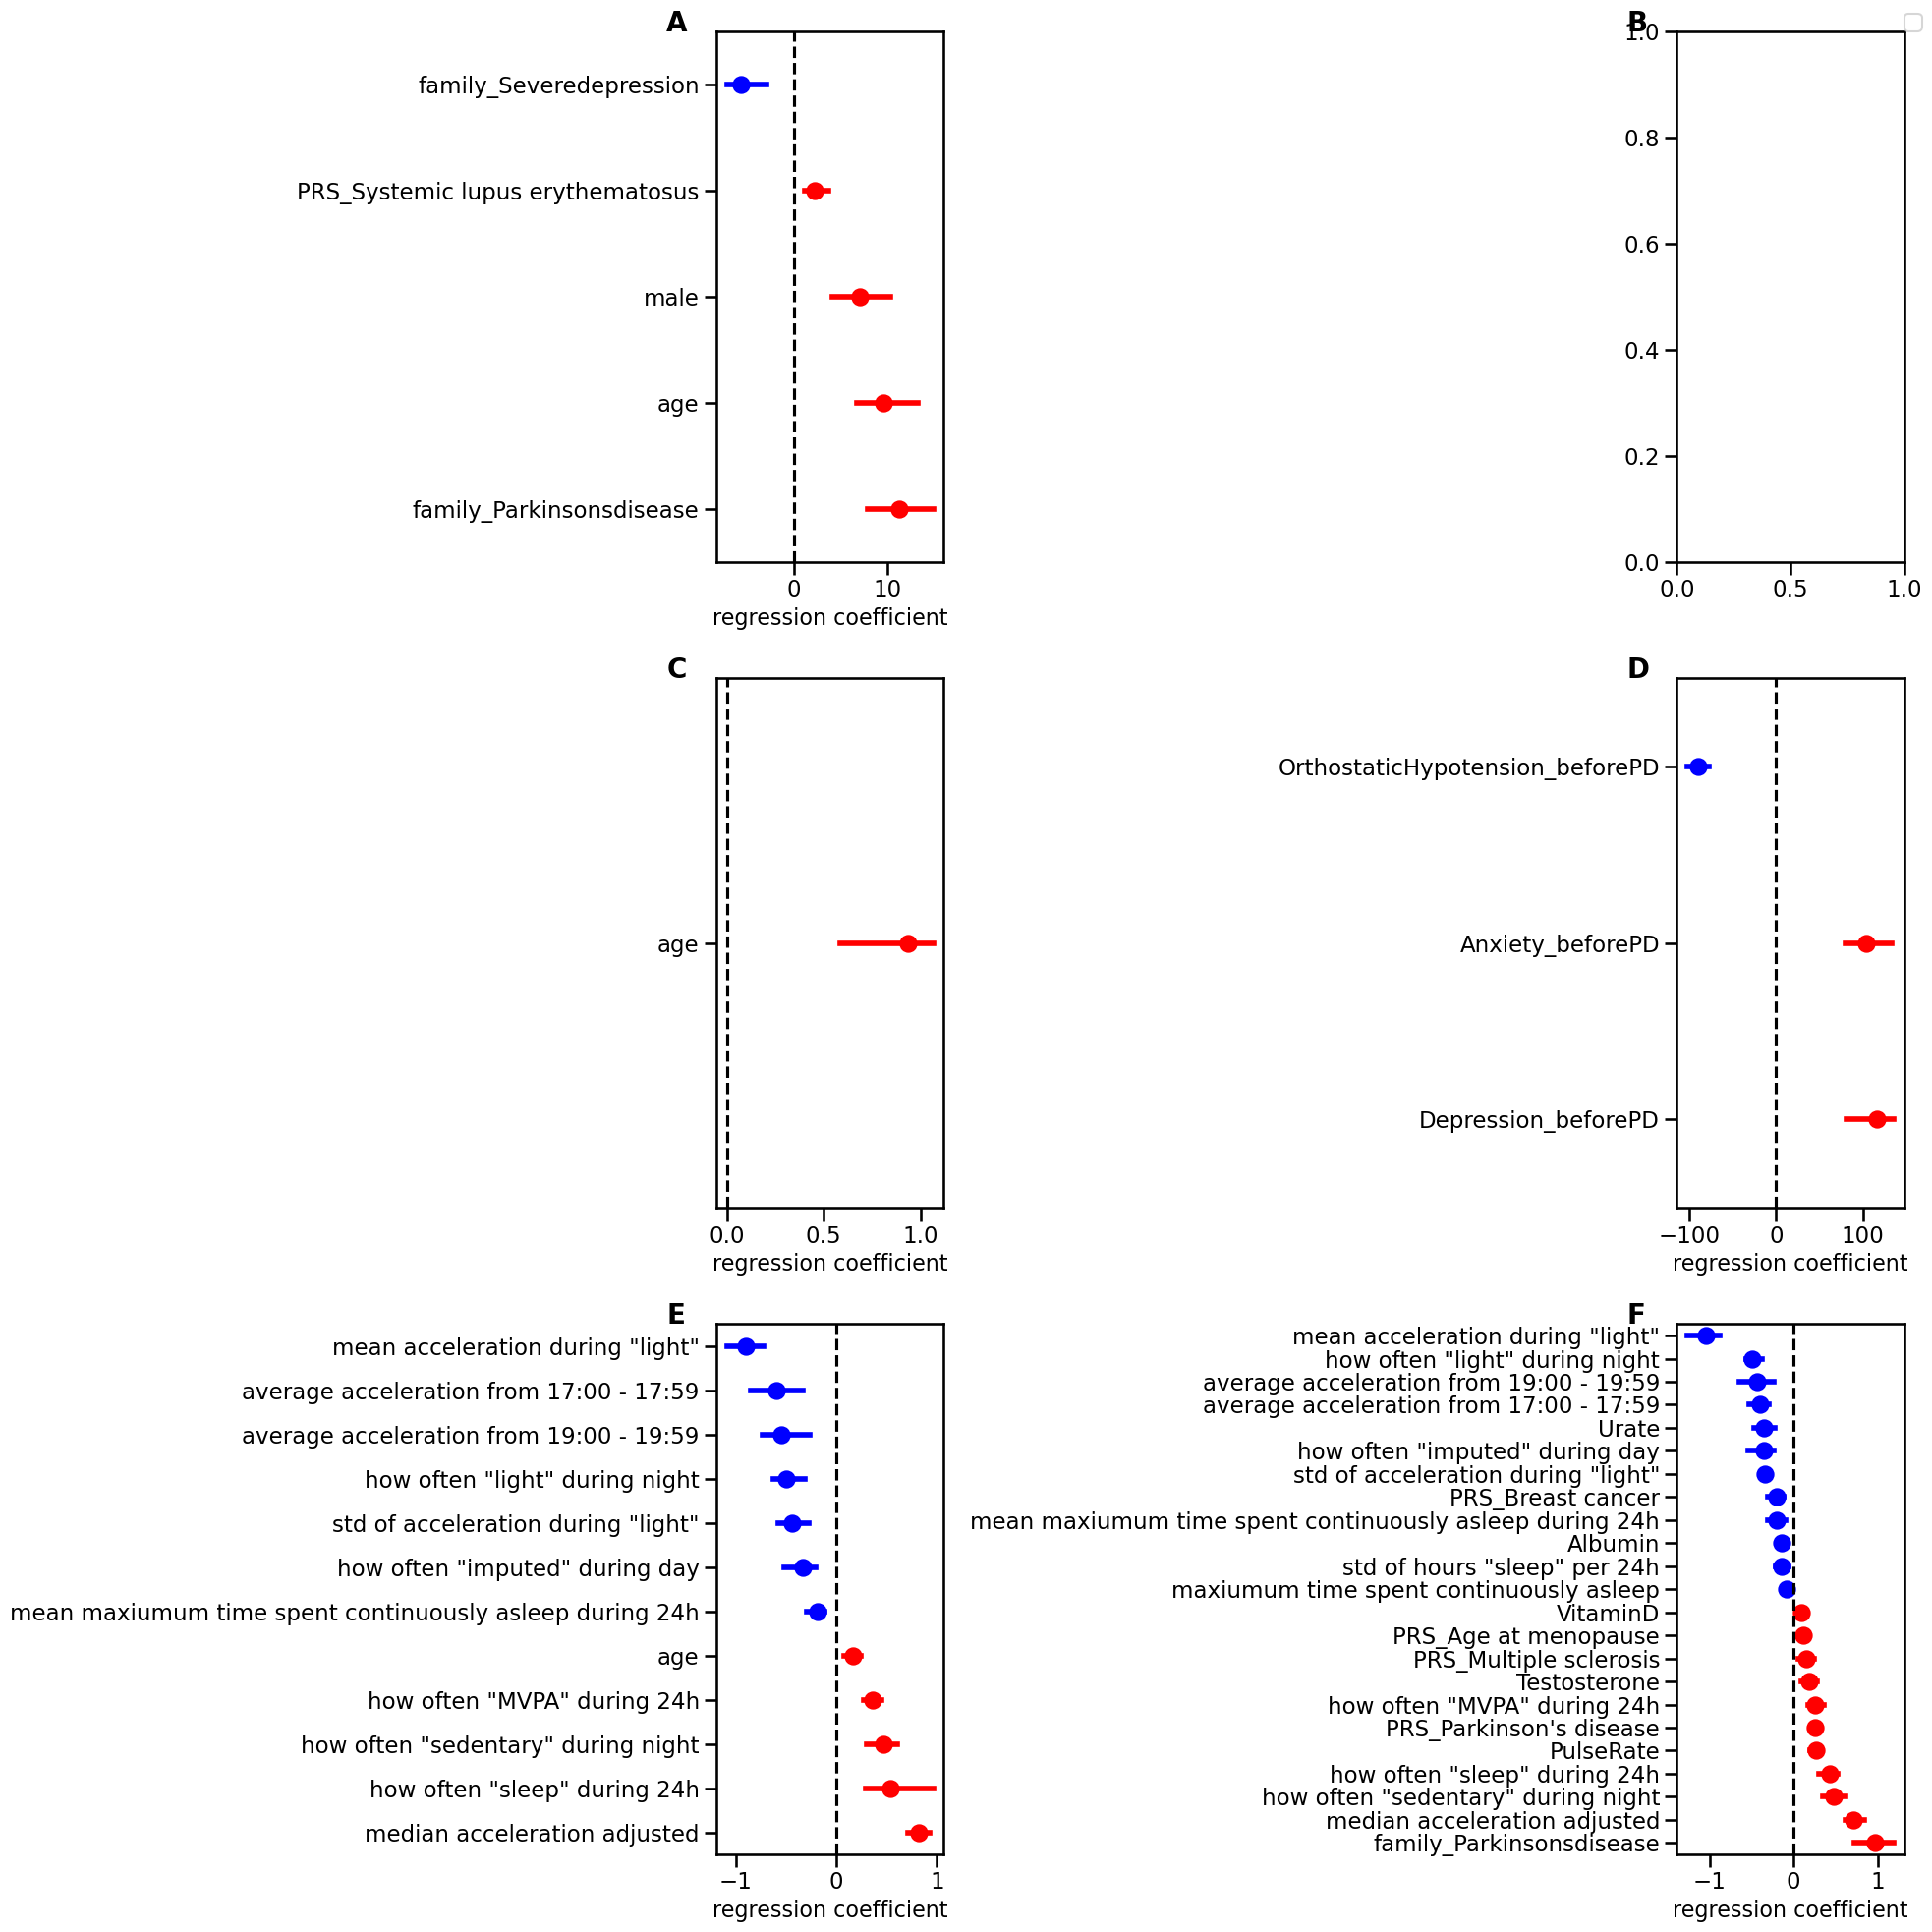

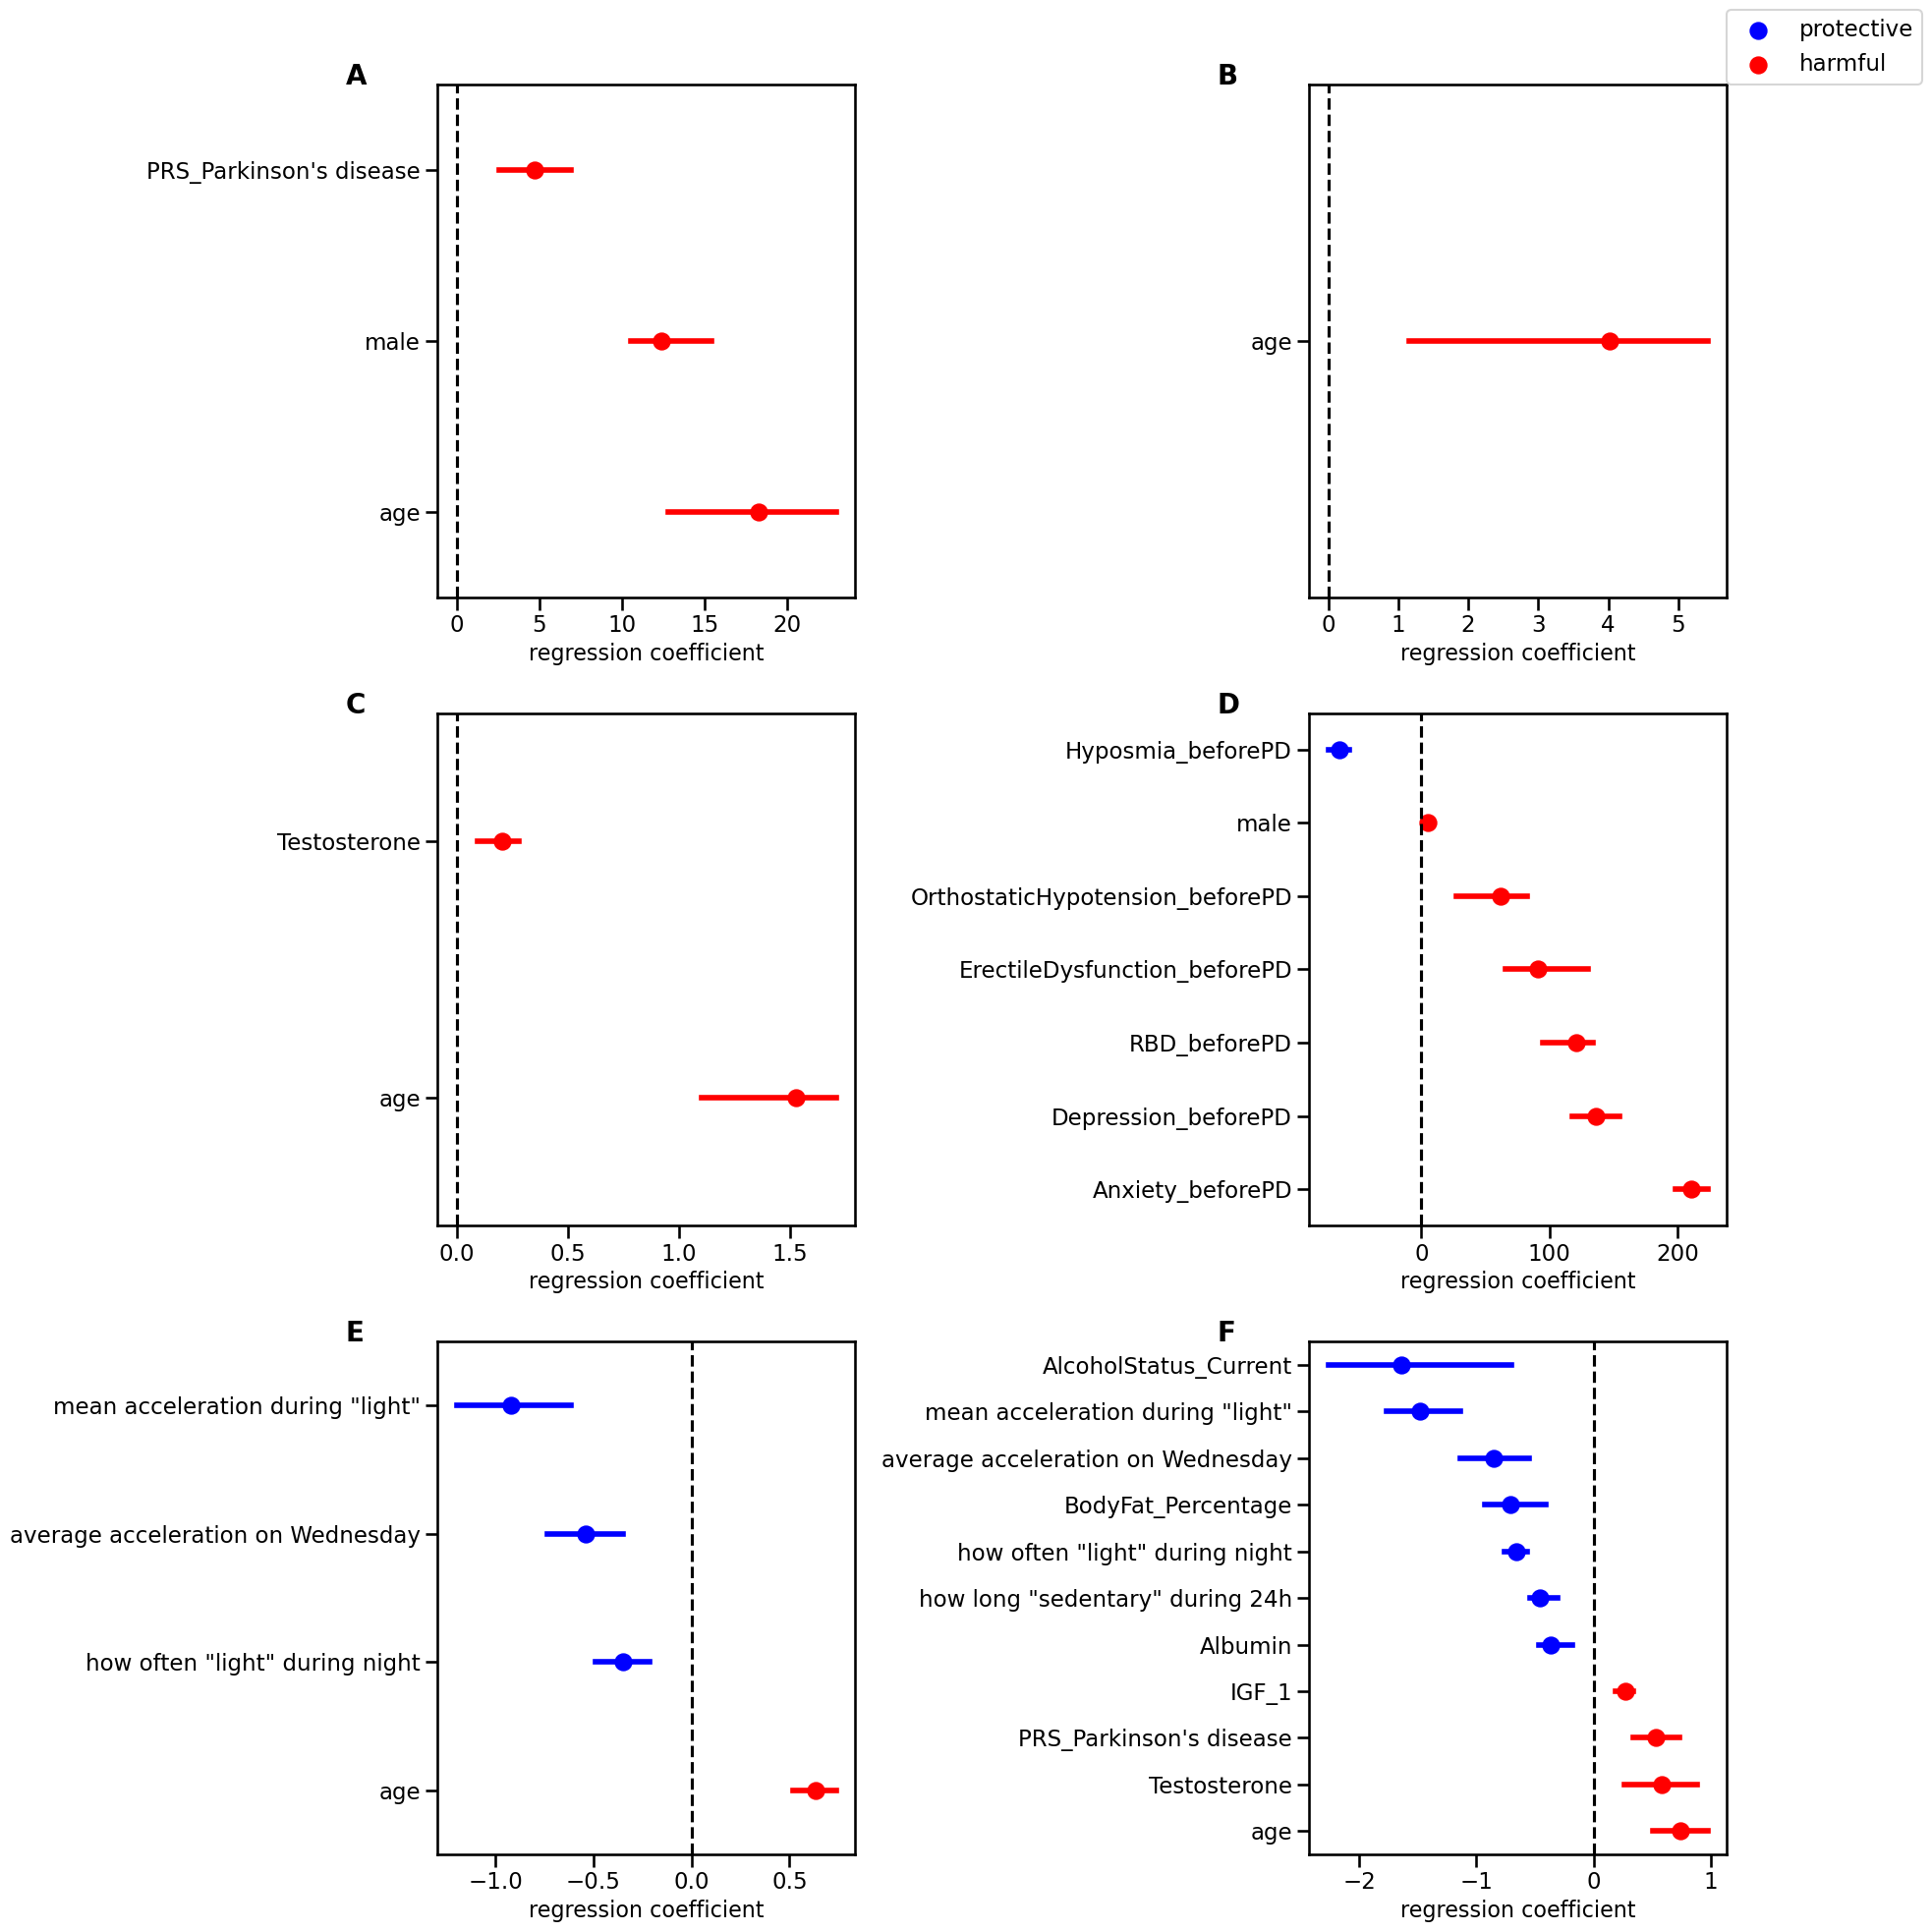

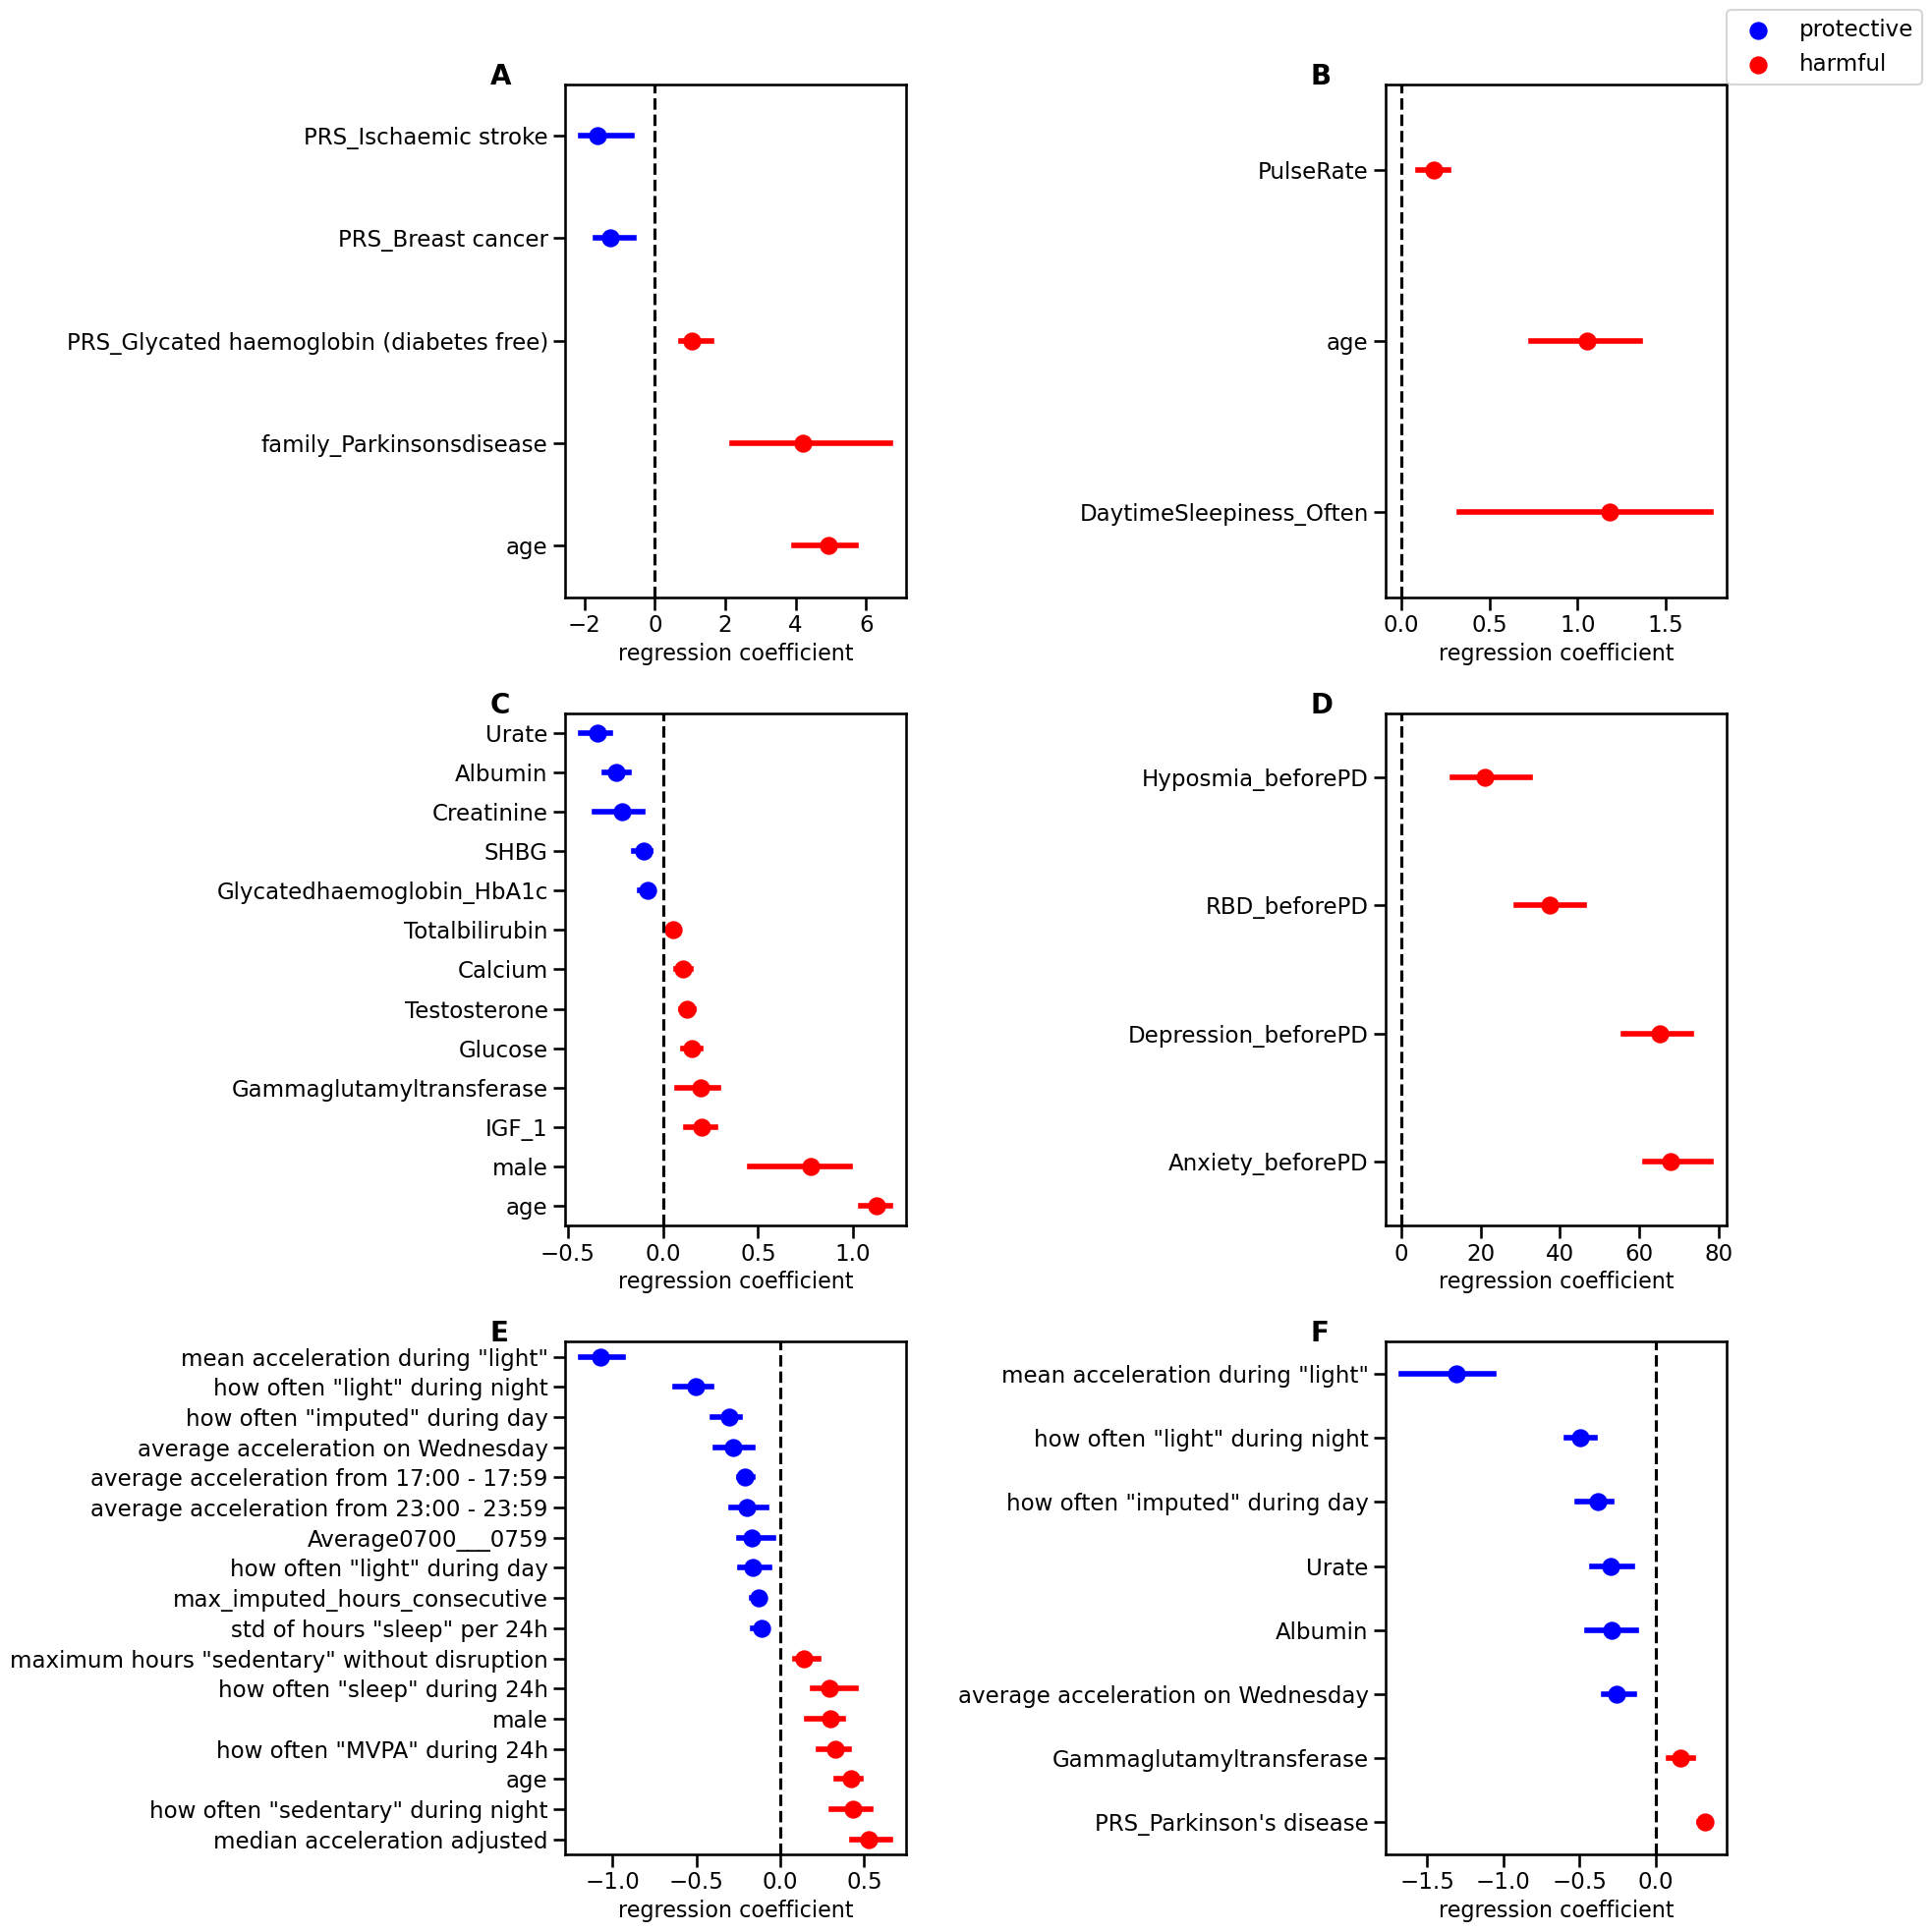

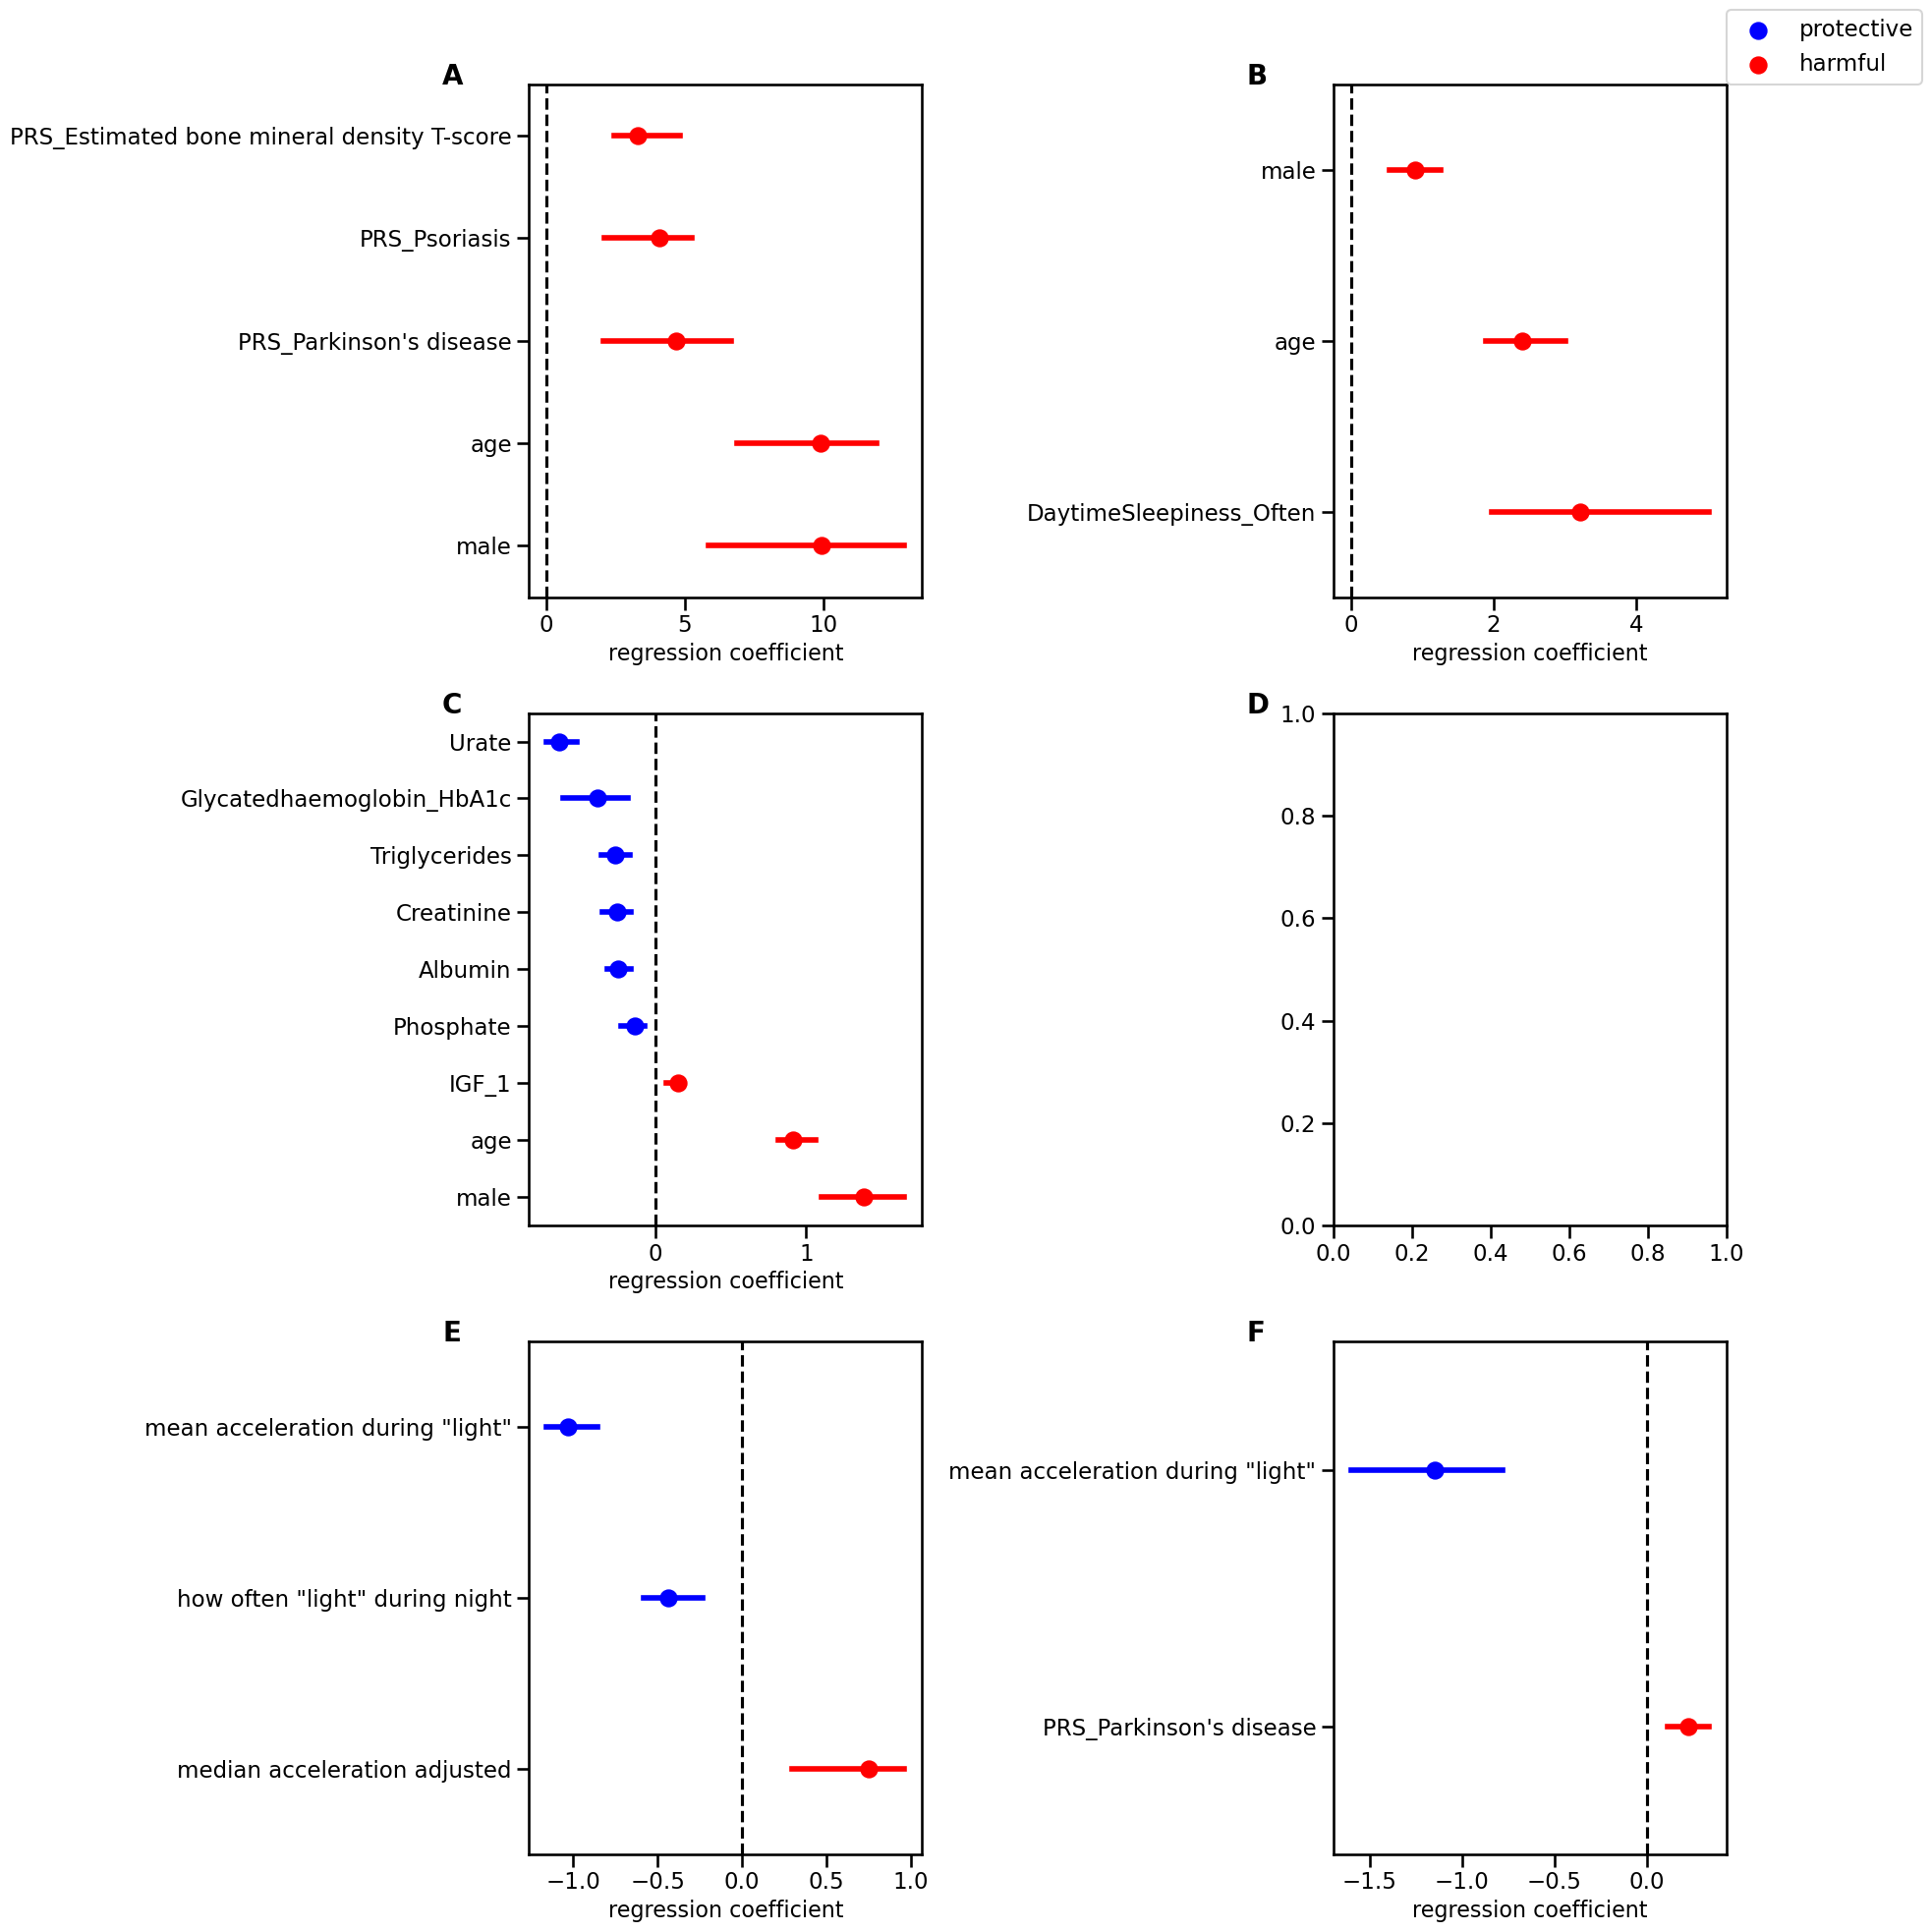

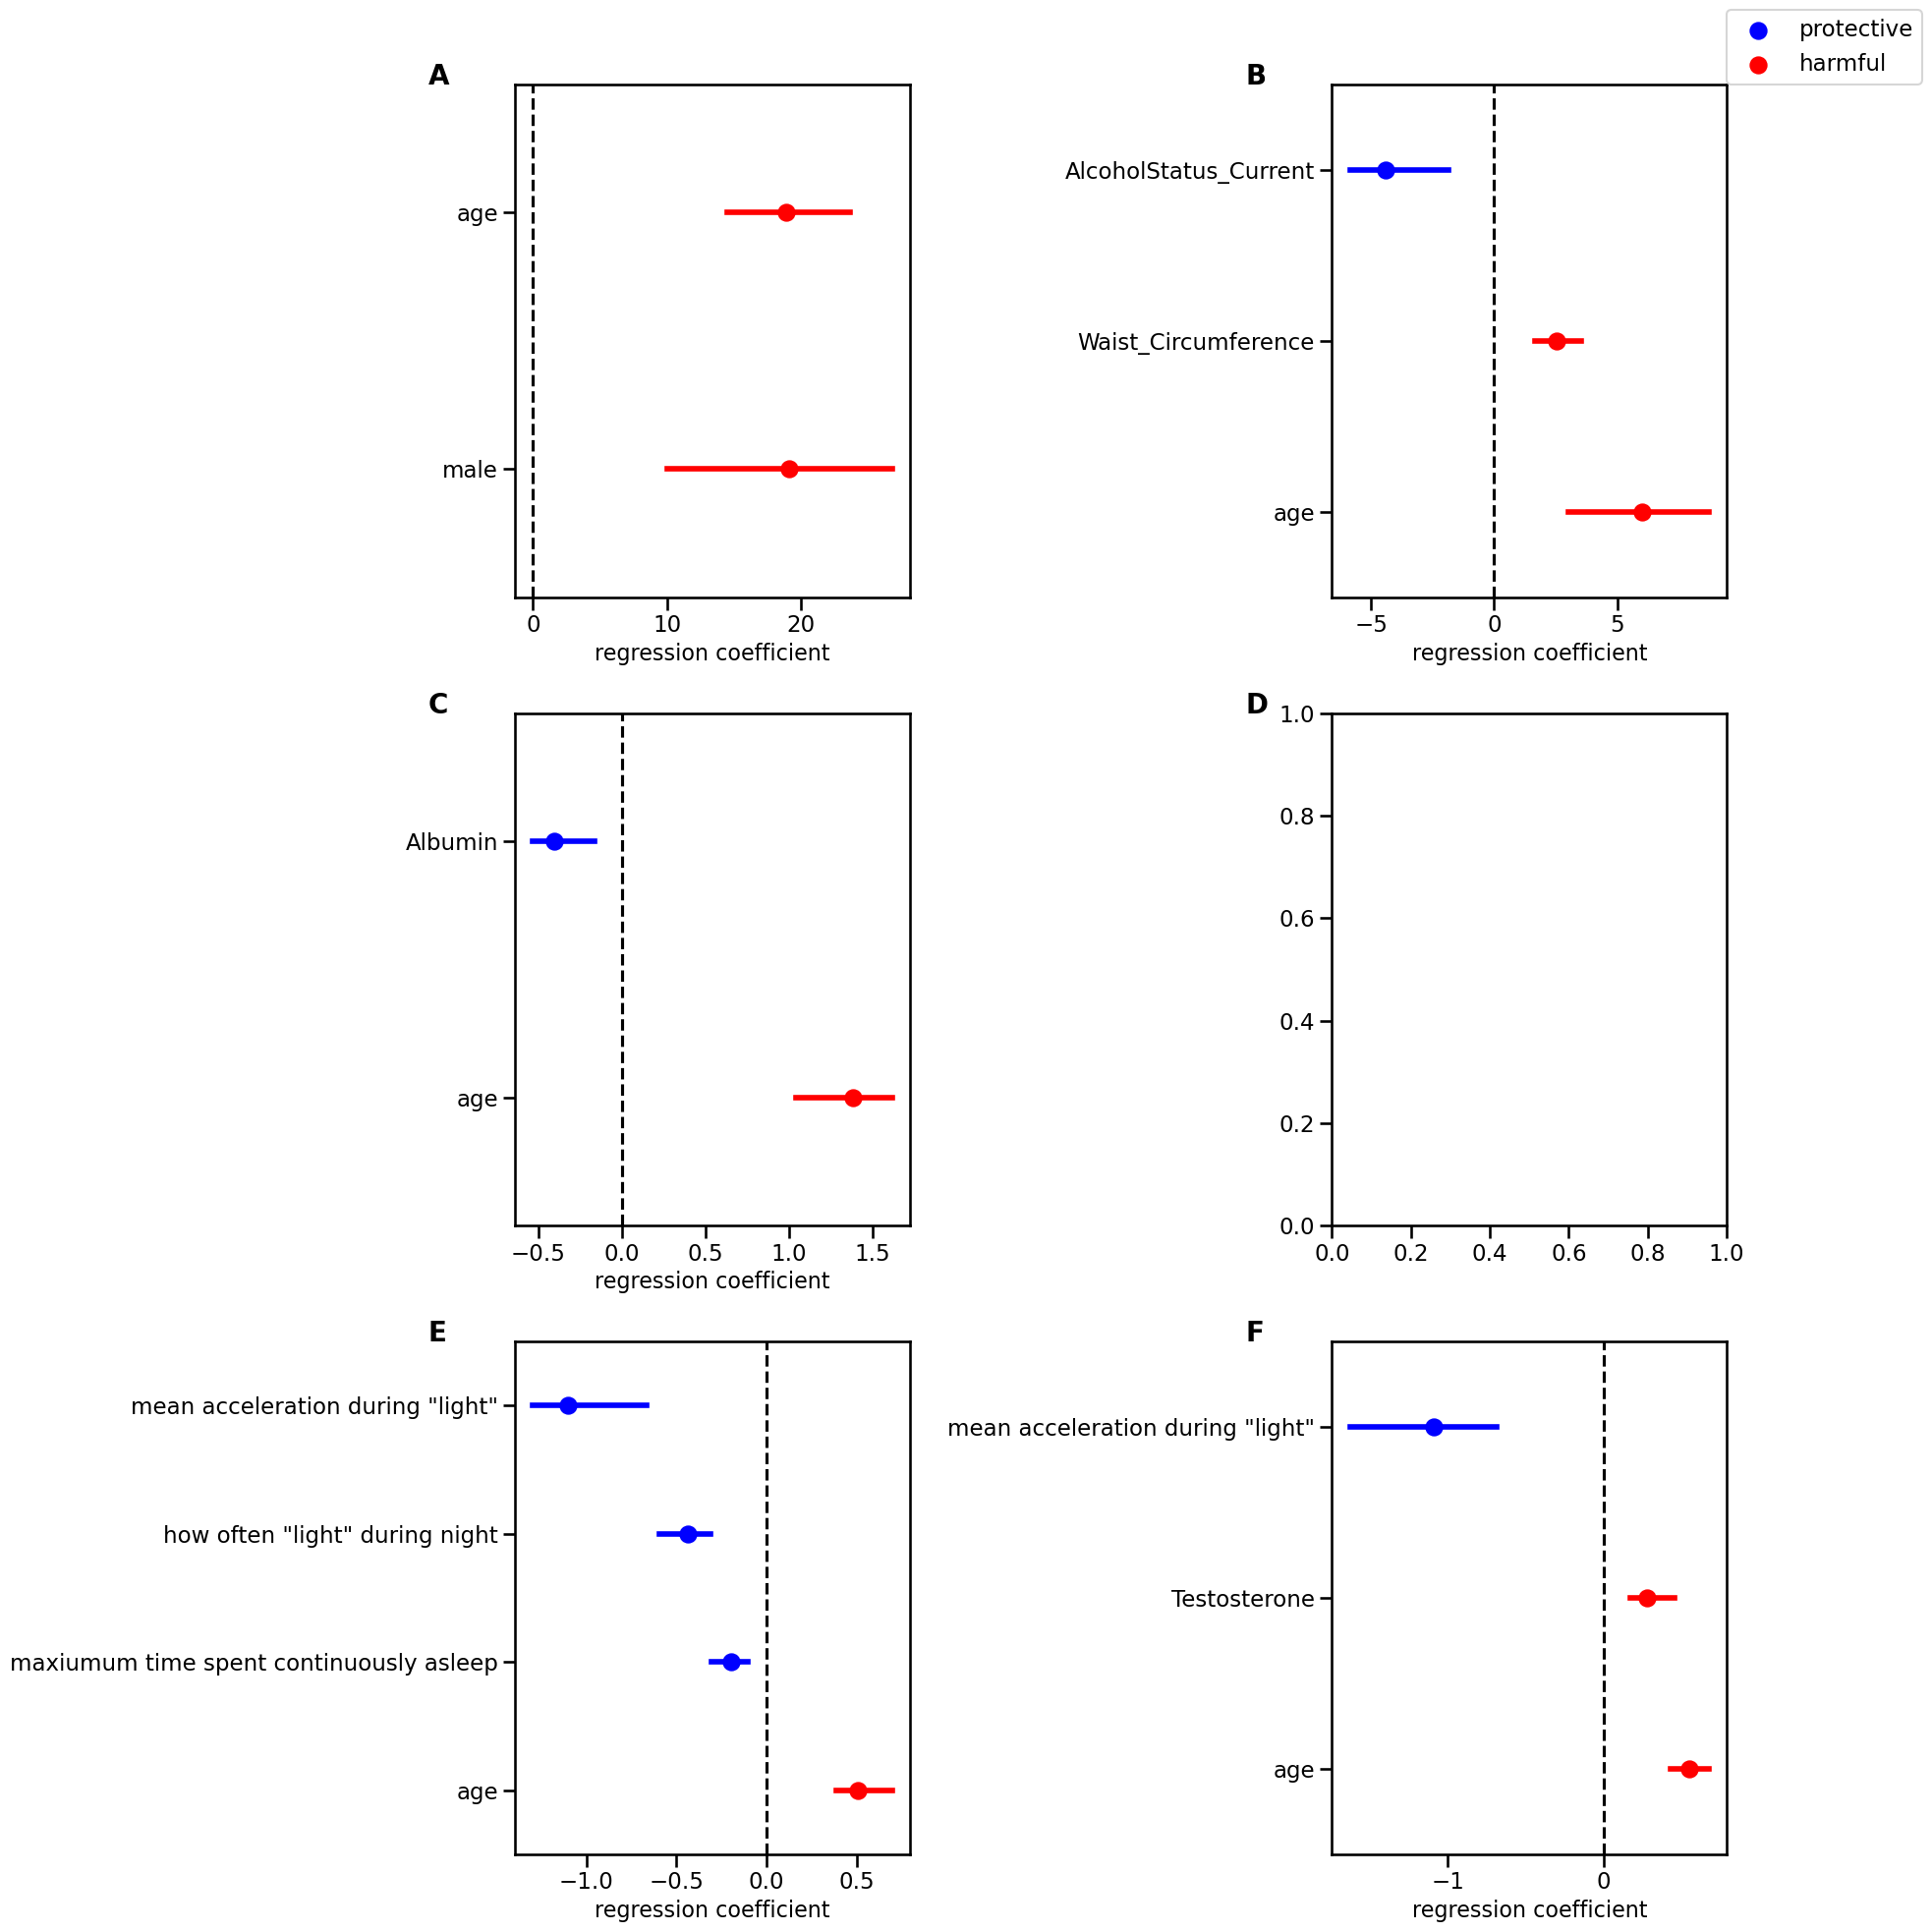

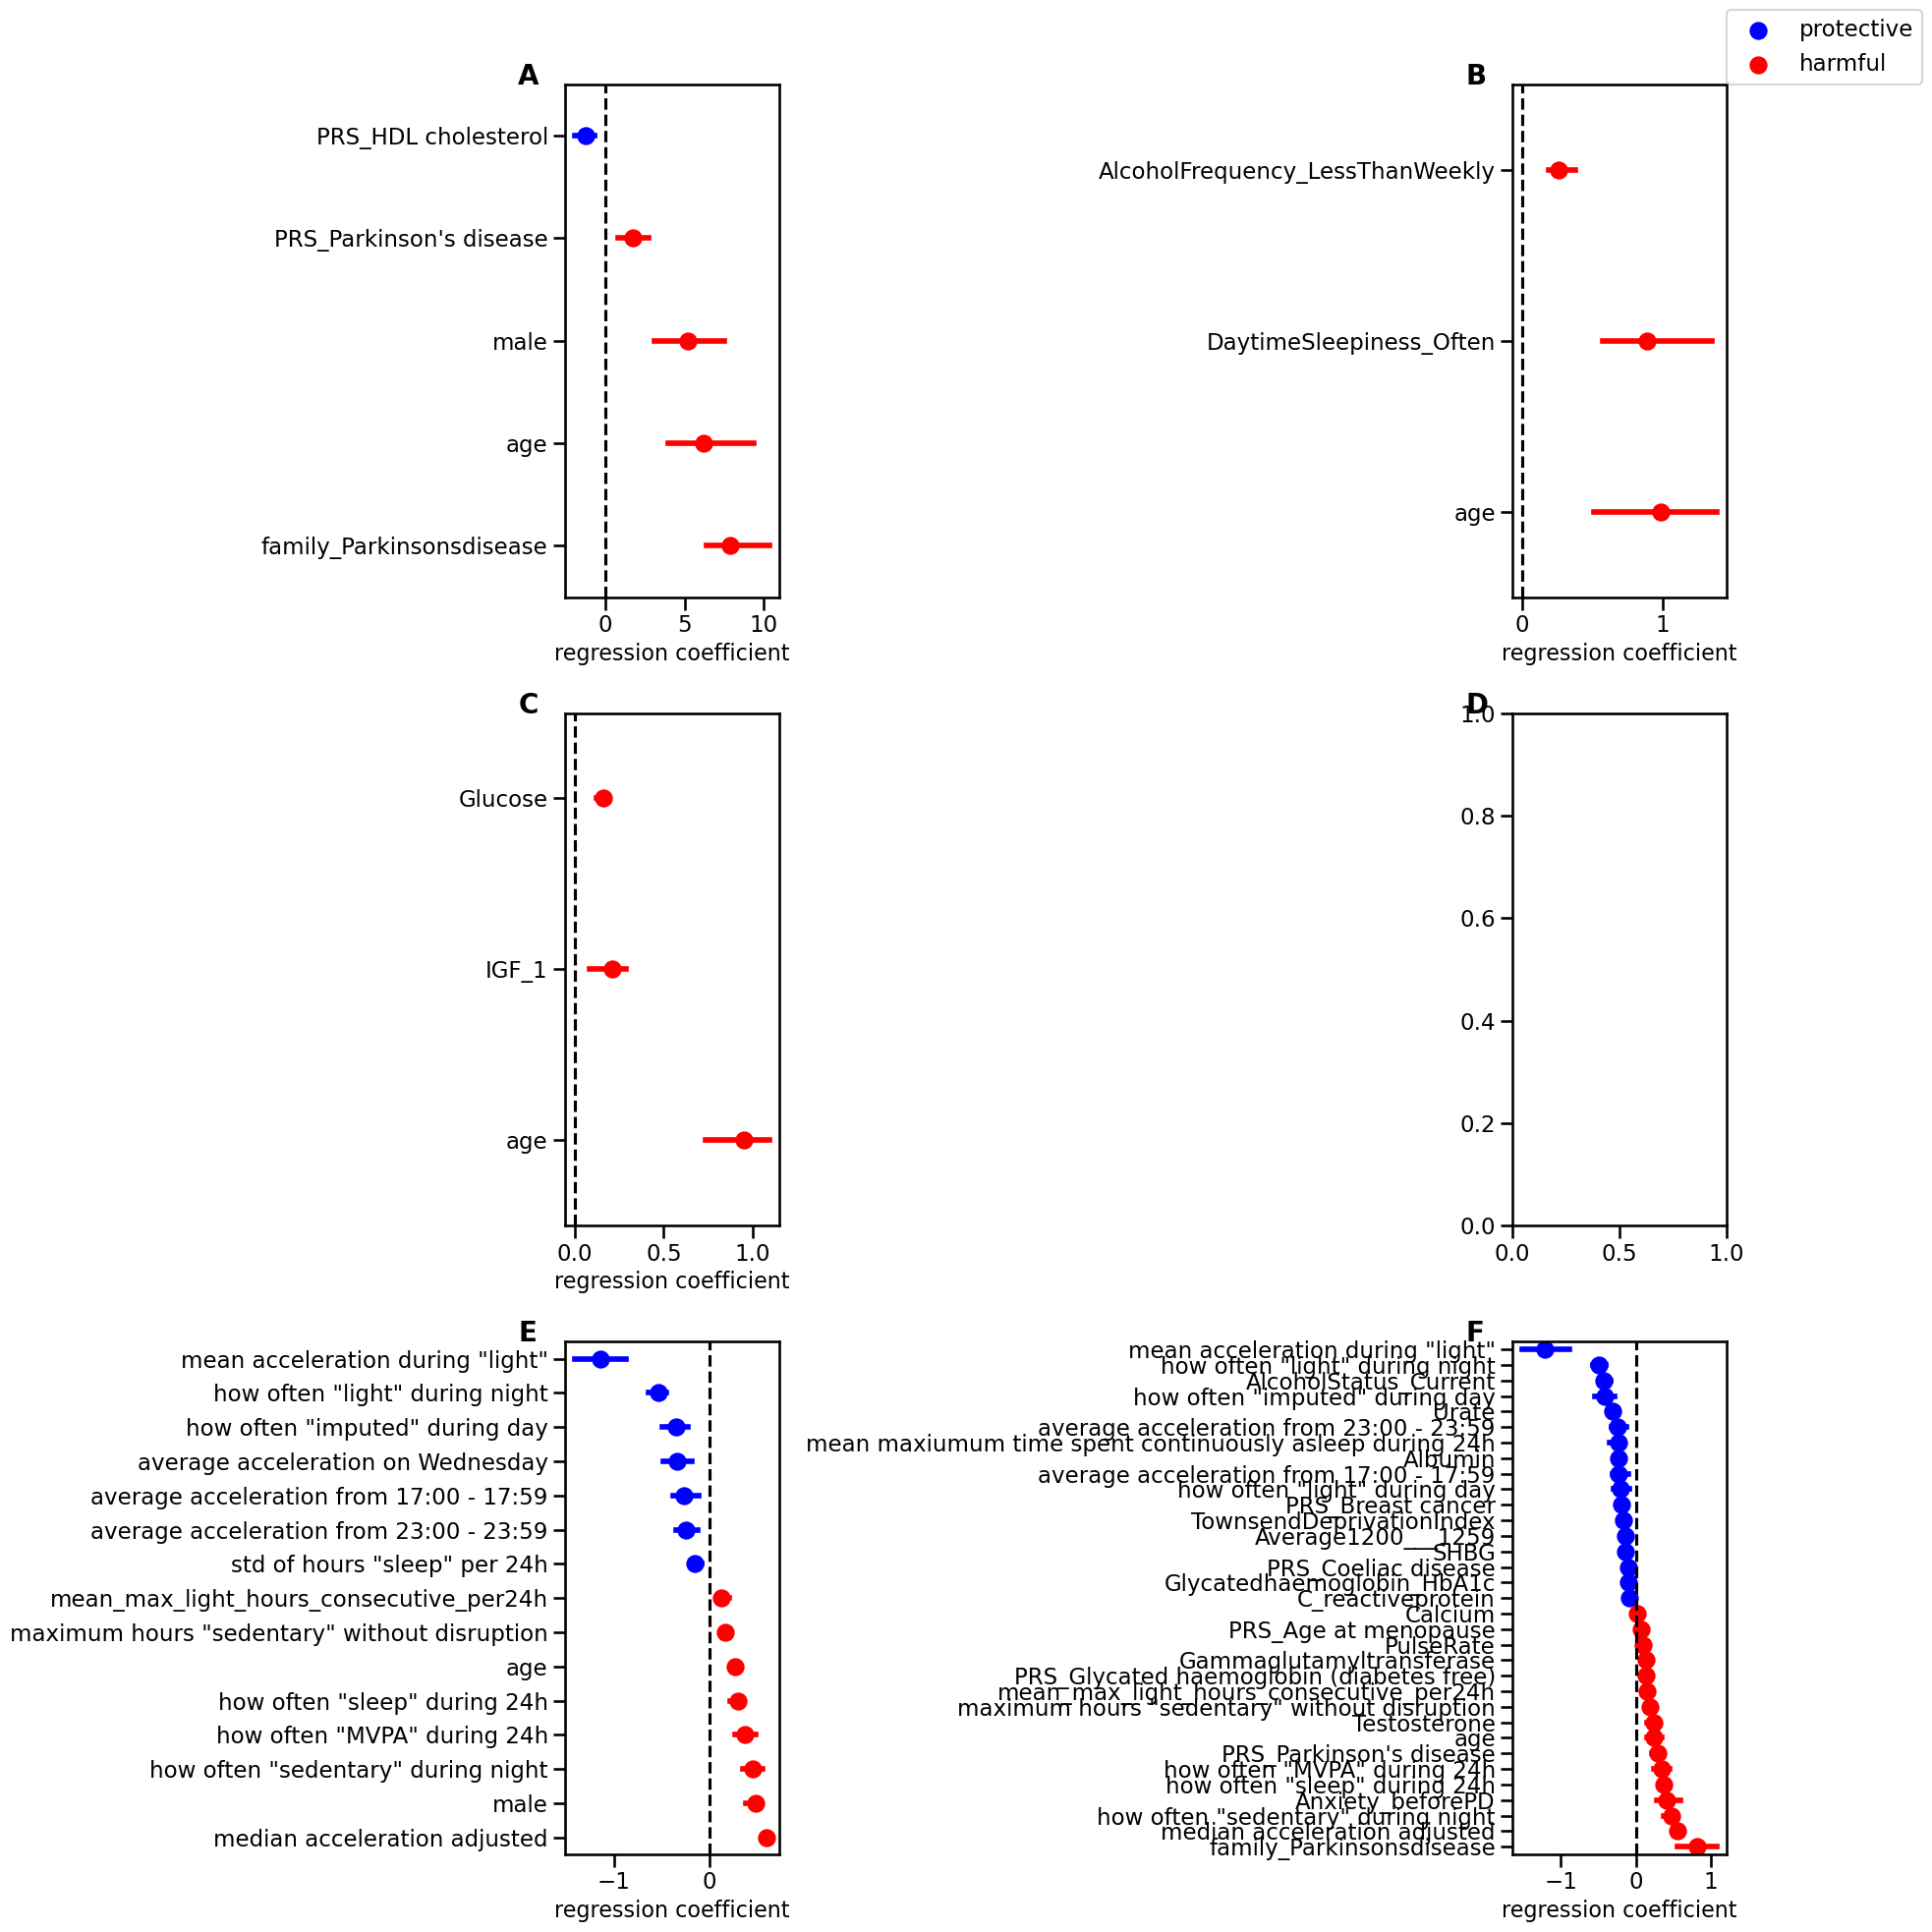

In [13]:
# feature importance consensus
diags = ['diag_PDHC','diag_ProdHC','diag_PDProdHC','diag_PDHC','diag_ProdHC','diag_PDProdHC','diag_PDPopulationNoProd','diag_ProdPopulationNoPD','diag_PDProdPopulation']
diagnames = ['diag_PDHC','diag_ProdHC','diag_PDProdHC','diag_PDallHC','diag_ProdallHC','diag_PDProdallHC','diag_PDPopulationNoProd','diag_ProdPopulationNoPD','diag_PDProdPopulation']
kinds = ['HC','HC','HC','allHC','allHC','allHC','pop','pop','pop']
features = ['genetics+family','lifestyle_nofam','blood','prodromalsigns_beforePD',
            'all_acc_features','all_acc_features+blood+lifestyle+genetics+prodromalsigns_beforePD']
PRSs = pd.Index(['Age at menopause', "Alzheimer's disease",
       'Atrial fibrillation', 'Age-related macular degeneration', 'Asthma',
       'Breast cancer', 'Bipolar disorder', 'Body mass index',"Crohn's disease", 'Coeliac disease', 'Bowel cancer',
       'Cardiovascular disease UK', 'Estimated bone mineral density T-score',
       'Epithelial ovarian cancer', 'Glycated haemoglobin (diabetes free)',
       'HDL cholesterol', 'Height''Hypertension', 'Intraocular pressure', 'Ischaemic stroke',
       'LDL cholesterol (statin free)', 'Melanoma', 'Multiple sclerosis',
       'Osteoporosis', 'Prostate cancer', "Parkinson's disease", 'Psoriasis',
        'Rheumatoid arthritis', 'Schizophrenia', 'Systemic lupus erythematosus',
        'Type 1 diabetes', 'Type 2 diabetes', 'Ulcerative colitis','Venous thromboembolic disease'])
savefig2 = []

for j,kind,diag,diagname in zip(np.arange(len(diags)),kinds,diags,diagnames):
        savefig=f'{image_path}/selected_features_sign5fold_{diagname}'
        labels = ['A','B','C','D','E','F']
        figsingle,axessingle = plt.subplots(nrows=3,ncols=2,figsize=(20,20))
        plots.plot_context()
        for (i,f),ax,label in zip(enumerate(features),axessingle.flatten(),labels):
                if kind == 'pop':
                    path = f'{data_path}/{f}/{kind}modelsNoPD_params_stacked_allHC.csv'
                elif kind == 'allHC':
                    path = f'{data_path}/{f}/HCmodels_params_stacked_allHC.csv'
                elif kind == 'HC':
                    path = f'{data_path}/{f}/{kind}models_params_stacked_matched.csv'
                print(diag)

                param = pd.read_csv(path)
                if f=='genetics+family' or f==features[-1]:
                    param.rename(columns = dict(zip(PRSs, 'PRS_'+PRSs)), inplace=True)
                predictors = param.columns[2:]
                params = pd.DataFrame(index=predictors,columns=['mean','std'])
                param = param.dropna(axis='rows',how='all',subset=predictors)
                param = param[param['model']==diag]
                params.loc[predictors,'mean'] = param[predictors].mean(axis=0).values
                params.loc[predictors,'std'] = param[predictors].std(axis=0).values

                param = param.set_index(['model','cv_fold']).stack().droplevel(level=[0,1]).reset_index()
                params = params.sort_values('mean',ascending=True)
                plot_features_CI(param,params,ci=100-(0.05/len(predictors)),ax=ax)
                ax.text(-0.22, 1,label, transform=ax.transAxes,size=20, weight='bold')
                if i == 1:
                    ax.legend(loc=(1,1))
                else:
                    ax.legend([],[],frameon=False)
                if f == 'all_acc_features+blood+lifestyle+genetics+prodromalsigns_beforePD' and kind=='pop' and False:
                    if j==6:
                        savefig2=f'{image_path}/selected_features_sign5fold_combined'
                        figc,axesc = plt.subplots(ncols=2,figsize=(7,3))
                        plots.plot_context()
                    if diagname == 'diag_PDPopulationNoProd':
                        plot_features_CI(param,params,ci=100-(0.05/len(predictors)),ax=axesc[0])
                        axesc[0].text(-0.22, 1,'A', transform=axesc[0].transAxes,size=20, weight='bold')
                        axesc[0].legend([],[],frameon=False)
                    elif diagname == 'diag_ProdPopulationNoPD':
                        plot_features_CI(param,params,ci=100-(0.05/len(predictors)),ax=axesc[1])
                        axesc[1].text(-0.22, 1,'B', transform=axesc[1].transAxes,size=20, weight='bold')
                        axesc[1].legend(loc=(1,1))


        if savefig:
            figsingle.tight_layout()
            figsingle.savefig(f'{savefig}.pdf',bbox_inches='tight',dpi=300)
            figsingle.savefig(f'{savefig}.png',bbox_inches='tight',dpi=300)
        if savefig2:
            figc.tight_layout()
            figc.savefig(f'{savefig2}.pdf',bbox_inches='tight',dpi=300)
            figc.savefig(f'{savefig2}.png',bbox_inches='tight',dpi=300)

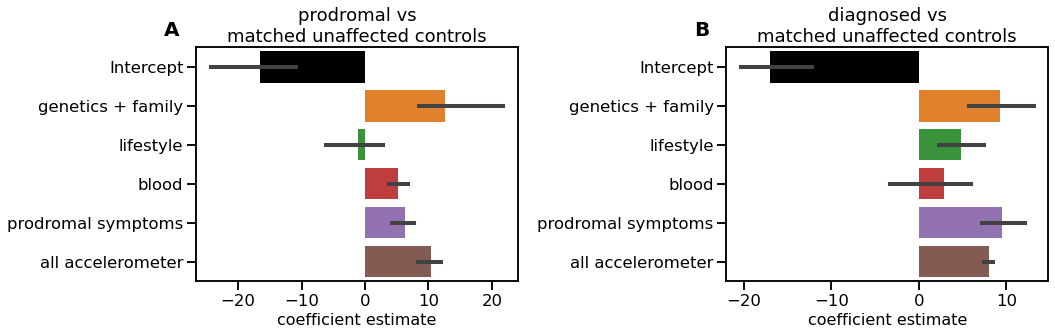

In [6]:
# stacked coefs
labels = ['A','B']
kinds = ['matched unaffected controls']
cols = sns.color_palette("tab10")[1:6]
cols.insert(0,(0,0,0))

cases = ['Prod','PD']
fig,axes = plt.subplots(ncols=2,figsize=(15,5))
plots.plot_context()
for (i,case),name,ax,label in zip(enumerate(cases),['prodromal','diagnosed'],axes.flatten(),labels):
    path = f'{data_path}/all_acc_features+blood+lifestyle+genetics+prodromalsigns_beforePD/{case}HC_matched_stacked.csv'
    coefs = pd.read_csv(path,header=[0,1],index_col=0)
    temp = coefs.unstack().to_frame().reset_index()
    temp[0] = temp[0].astype(float)
    coef_pivot = pd.pivot_table(index = ['modality','level_2'], columns=['statistic'],values=0,data=temp).reset_index()
    coef_pivot['modality'] = coef_pivot['modality'].replace(['all_acc_features','prodromal_symptoms','genetics'],
                                                            ['all accelerometer','prodromal symptoms','genetics + family'])

    ax = sns.barplot(data=coef_pivot,y='modality',x='coef',color='k',ci=100-0.05/6,ax=ax,
                    order=['Intercept','genetics + family','lifestyle','blood','prodromal symptoms','all accelerometer'],
                     palette=cols)
    ax.set_xlabel('coefficient estimate')
    ax.set_ylabel('')
    ax.set_title(f'{name} vs\n{kinds[0]}')
    ax.text(-0.1, 1.05,label, transform=ax.transAxes,size=20, weight='bold')
plt.tight_layout()
plt.savefig(f'{image_path}/stackedmodel_coefs_matchedHC.pdf',dpi=300,bbox_inches='tight')
plt.savefig(f'{image_path}/stackedmodel_coefs_matchedHC.png',dpi=300,bbox_inches='tight')

/tmp/ipykernel_217073/2370716894.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99166666666666)` for the same effect.

  ax = sns.barplot(data=coef_pivot,y='modality',x='coef',color='k',ci=100-0.05/6,
/tmp/ipykernel_217073/2370716894.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 99.99166666666666)` for the same effect.

  ax = sns.barplot(data=coef_pivot,y='modality',x='coef',color='k',ci=100-0.05/6,


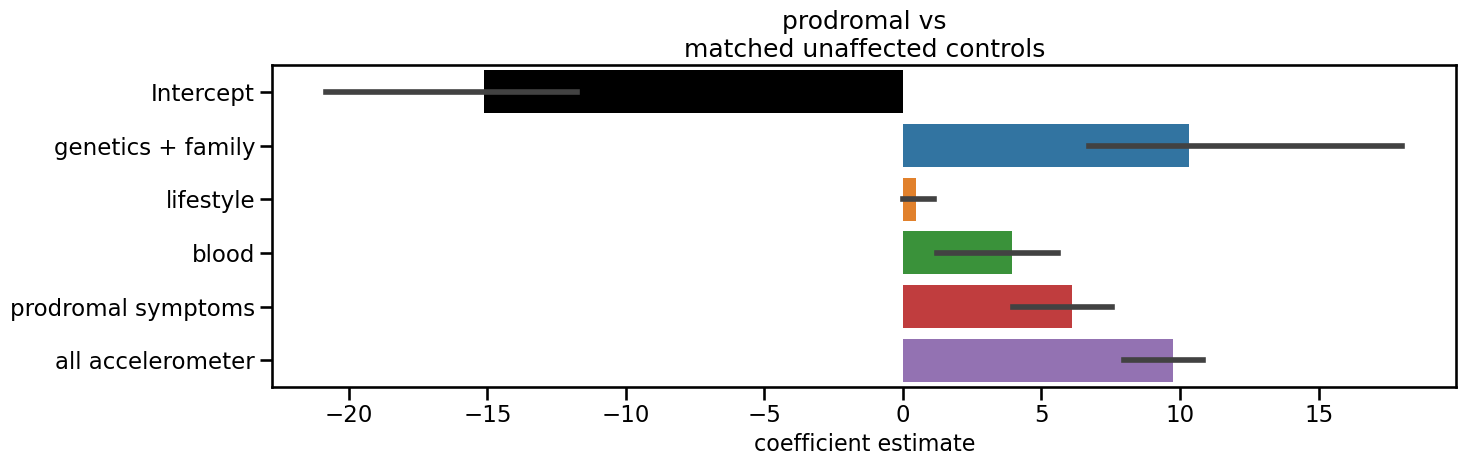

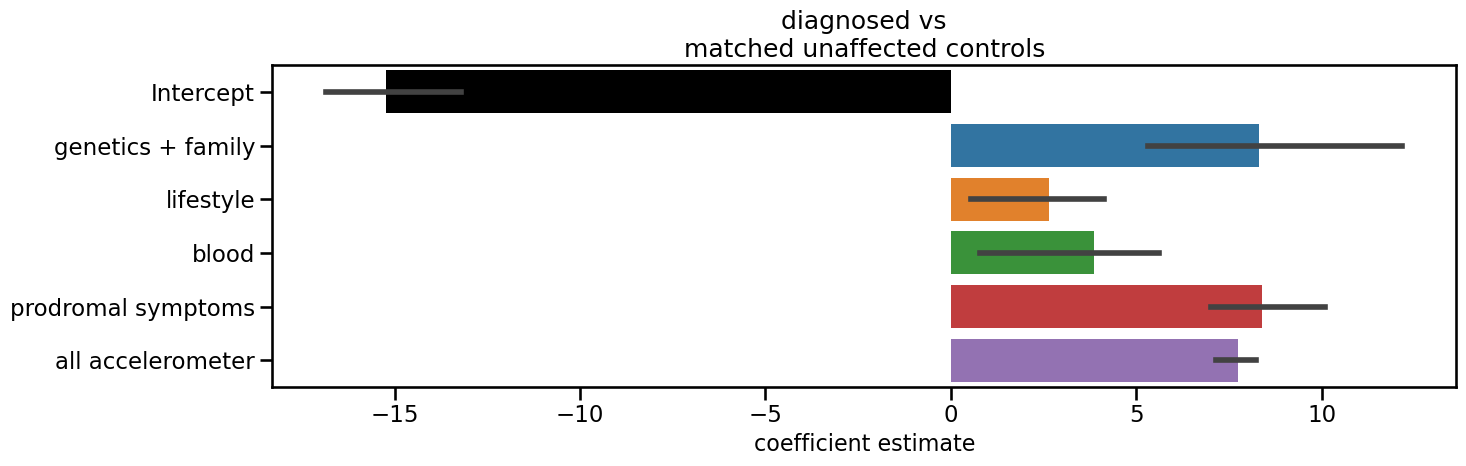

In [18]:
# stacked coefs
labels = ['A','B','C']
kinds = ['matched unaffected controls']#,'unaffected controls','population']
cols = sns.color_palette("tab10")[1:6]
cols.insert(0,(0,0,0))

cases = ['Prod','PD']
for (i,case),name in zip(enumerate(cases),['prodromal','diagnosed']):
    fig,axes = plt.figure(figsize=(15,5))
    plots.plot_context()
    for diag,ax,label,kind in zip([f'{case}HC',f'{case}allHC',f'{case}PopulationNo{cases[(i+1)%2]}'],np.arange(1),labels,kinds):
        if diag == 'ProdHC' or diag=='PDHC':
            path = f'{data_path}/all_acc_features+blood+lifestyle+genetics+prodromalsigns_beforePD/{diag}_matched_stacked.csv'
        elif diag == 'ProdallHC' or diag=='PDallHC':
            path = f'{data_path}/all_acc_features+blood+lifestyle+genetics+prodromalsigns_beforePD/{case}HC_allHC_stacked.csv'
        else:
            path = f'{data_path}/all_acc_features+blood+lifestyle+genetics+prodromalsigns_beforePD/{diag}_allHC_stacked.csv'
        coefs = pd.read_csv(path,header=[0,1],index_col=0)
        temp = coefs.unstack().to_frame().reset_index()
        temp[0] = temp[0].astype(float)
        coef_pivot = pd.pivot_table(index = ['modality','level_2'], columns=['statistic'],values=0,data=temp).reset_index()
        coef_pivot['modality'] = coef_pivot['modality'].replace(['all_acc_features','prodromal_symptoms','genetics'],
                                                                ['all accelerometer','prodromal symptoms','genetics + family'])

        ax = sns.barplot(data=coef_pivot,y='modality',x='coef',color='k',ci=100-0.05/6,
                        order=['Intercept','genetics + family','lifestyle','blood','prodromal symptoms','all accelerometer'],
                         palette=cols)
        ax.set_xlabel('coefficient estimate')
        ax.set_ylabel('')
        ax.set_title(f'{name} vs\n{kind}')
        #ax.text(-0.1, 1.05,label, transform=ax.transAxes,size=20, weight='bold')
    plt.tight_layout()
    plt.savefig(f'{image_path}/{case}_stackedmodel_coefs.pdf',dpi=300,bbox_inches='tight')
    plt.savefig(f'{image_path}/{case}_stackedmodel_coefs.png',dpi=300,bbox_inches='tight')

diag_PDHC
diag_ProdHC
diag_PDProdHC
diag_PDPopulationNoProd
diag_ProdPopulationNoPD
diag_PDProdPopulation


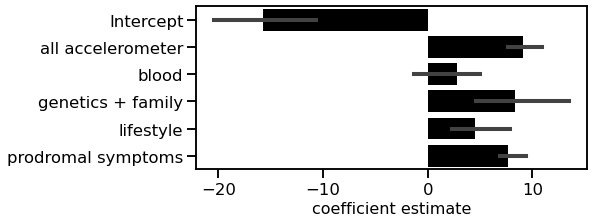

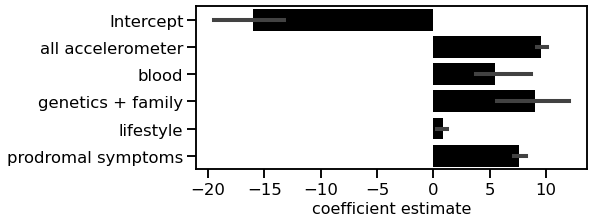

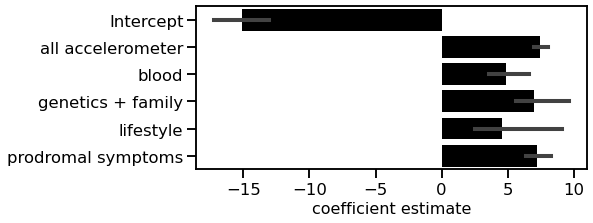

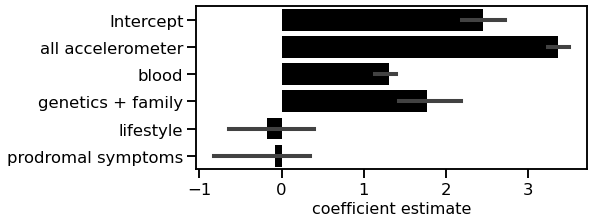

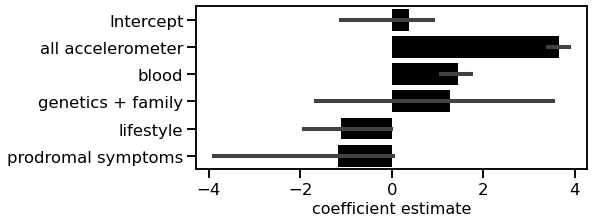

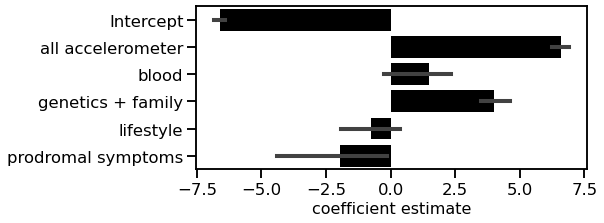

In [6]:
# stacked coefs
for diag in diags:
    print(diag)
    diag_name = diag.replace('diag_','')
    coefs = pd.read_csv(f'/scratch/c.c21013066/data/ukbiobank/analyses/acc_models/{diag_name}_stacked.csv',header=[0,1],index_col=0)
    temp = coefs.unstack().to_frame().reset_index()
    temp[0] = temp[0].astype(float)
    coef_pivot = pd.pivot_table(index = ['modality','level_2'], columns=['statistic'],values=0,data=temp).reset_index()
    coef_pivot['modality'] = coef_pivot['modality'].replace(['all_acc_features','prodromal_symptoms','genetics'],
                                                            ['all accelerometer','prodromal symptoms','genetics + family'])
    fig = plt.figure(figsize=(7,3))
    plots.plot_context()
    ax = sns.barplot(data=coef_pivot,y='modality',x='coef',color='k',ci=100-0.05/6)
    ax.set_xlabel('coefficient estimate')
    ax.set_ylabel('')
    plt.savefig(f'{image_path}/{diag}_stackedmodel_coefs.pdf',dpi=300,bbox_inches='tight')
    plt.savefig(f'{image_path}/{diag}_stackedmodel_coefs.png',dpi=300,bbox_inches='tight')